In [106]:
import glob
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [107]:
b19df = pd.read_csv('B19 Mapped Dust Outputs/B19_Master_DF2.csv')
#b19df = b19df.drop(b19df.columns[0], axis=1)

fitcoord_df = pd.read_csv('fitcoord csvs/codark_fulldf_I.csv')

b19df

lat_b19 = b19df['l'].to_numpy()

In [108]:
fitcoord_df

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit
0,150120,4067,HI,1,10.608966,0.261963,1.221581,0.148003,5.192746,0.148060,118.141440,3.256637,Ursa Major,F
1,150120,4067,67,1,0.003397,0.001488,-3.658921,1.611335,3.183563,1.611335,0.023558,0.006776,Ursa Major,F
2,150120,4067,65,1,0.002466,0.001126,1.338215,2.935009,5.567352,2.935009,0.037056,0.009872,Ursa Major,F
3,150120,4067,CO,1,0.024321,0.000140,0.000500,0.002414,0.084556,0.000595,0.000000,0.000000,Ursa Major,F
4,119210,2000,HI,1,25.239004,0.566368,-11.563658,0.108095,2.904288,0.098246,213.086720,1.872514,Polaris,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,156540,3513,CO,2,0.126297,0.314741,0.436334,0.079036,1.418376,0.084756,0.086818,0.006661,Ursa Major,T
216,125220,3250,HI,1,36.662619,0.776355,1.152745,0.067798,2.775750,0.067794,225.839360,3.423336,Polaris,F
217,125220,3250,67,1,0.120393,0.002593,0.069041,0.026084,1.048728,0.026070,0.261557,0.003814,Polaris,F
218,125220,3250,65,1,0.068332,0.002713,0.234129,0.044017,0.961648,0.044164,0.139975,0.003612,Polaris,F


In [109]:
fitcoord_df = fitcoord_df.sort_values(by="l (deg)", ascending=True)
fitcoord_df

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit
184,119070,2800,HI,1,25.108944,0.262239,-4.629767,0.021005,1.847756,0.024123,128.081920,0.290790,Polaris,F
185,119070,2800,HI,2,6.805908,0.134199,-9.986011,0.218256,11.427904,0.200721,281.405440,0.755494,Polaris,F
186,119070,2800,67,1,0.086602,0.002528,-4.358241,0.037192,1.103239,0.037201,0.215733,0.004011,Polaris,F
187,119070,2800,67,2,0.002166,0.134199,0.925883,0.218256,0.925883,0.200721,0.002390,0.000081,Polaris,T
188,119070,2800,65,1,0.043520,0.002556,-4.251790,0.073304,1.081164,0.073336,0.106663,0.004928,Polaris,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,156540,3513,67,2,0.032019,0.002822,-3.067126,0.090899,0.883919,0.091281,0.063872,0.003638,Ursa Major,F
136,156640,3250,HI,1,23.456820,0.679447,-0.742946,0.095651,2.861469,0.095685,134.853120,4.547945,Ursa Major,F
137,156640,3250,67,1,0.005350,4.088013,-0.657100,51.949659,0.303745,102.735789,0.002210,0.002247,Ursa Major,F
138,156640,3250,65,1,0.002425,0.001370,0.949288,2.455072,3.763955,2.455072,0.023622,0.006867,Ursa Major,F


In [110]:
b19df

,l,b,Total Av [mag],Distance of Max Av [pc],FWHM [pc],Column Density [cm^-2],Volume Density [cm^-3],Max Av [mag]
0,125.22,32.50,1.419756,[336.33762518],17.044796,1.178397e+22,224.052300,NaN
1,146.07,17.75,1.588171,[201.14449213],4.513693,1.318182e+22,946.439083,NaN
2,151.50,19.25,0.621320,[179.1130186],10.234841,5.156955e+21,163.290782,NaN
3,156.54,35.13,0.427502,[238.19742489],10.927035,3.548270e+21,105.235870,NaN
4,147.20,40.75,0.948918,[201.14449213],8.805223,7.876018e+21,289.878355,NaN
5,148.21,23.50,0.543488,[179.1130186],16.615095,4.510950e+21,87.986224,NaN
6,125.50,22.00,0.867756,[283.26180258],15.709148,7.202373e+21,148.584134,NaN
7,143.00,38.50,1.082287,[356.36623748],7.786993,8.982980e+21,373.852314,NaN
8,119.21,20.00,0.531475,[300.28612303],12.939459,4.411245e+21,110.482763,NaN
9,137.16,43.00,0.127827,[169.09871245],6.528231,1.060963e+21,52.668914,NaN


In [111]:
b19df = b19df.sort_values(by="l", ascending=True)

b19df

,l,b,Total Av [mag],Distance of Max Av [pc],FWHM [pc],Column Density [cm^-2],Volume Density [cm^-3],Max Av [mag]
12,119.07,28.00,0.839006,[356.36623748],13.029773,6.963747e+21,173.203073,NaN
8,119.21,20.00,0.531475,[300.28612303],12.939459,4.411245e+21,110.482763,NaN
10,120.50,29.63,0.528482,[336.33762518],10.189696,4.386398e+21,139.507089,NaN
14,120.50,18.63,0.831956,[283.26180258],13.833790,6.905236e+21,161.765830,NaN
24,121.07,21.75,1.286214,[300.28612303],11.611080,1.067558e+22,297.967099,NaN
18,121.93,19.75,0.291662,[267.23891273],6.506199,2.420799e+21,120.581529,NaN
23,122.22,18.75,0.377041,[300.28612303],13.016710,3.129443e+21,77.913963,NaN
17,123.50,19.63,0.776805,[356.36623748],48.718866,6.447486e+21,42.888678,NaN
11,125.07,19.50,0.623008,[267.23891273],21.377317,5.170963e+21,78.391268,NaN
0,125.22,32.50,1.419756,[336.33762518],17.044796,1.178397e+22,224.052300,NaN


In [112]:
fitcoord_df['l_scaled'] = fitcoord_df['l (deg)'] / 1000
fitcoord_df['b_scaled'] = fitcoord_df['b (deg)'] / 100
merged_df_b19 = pd.merge(
    fitcoord_df,
    b19df[['l', 'b', 'Total Av [mag]', 'Distance of Max Av [pc]', 'FWHM [pc]', 'Column Density [cm^-2]', 'Volume Density [cm^-3]']],
    left_on=['l_scaled', 'b_scaled'],
    right_on=['l', 'b'],
    how='left'
)
merged_df_b19 = merged_df_b19.drop(columns = ['l (deg)', 'b (deg)', 'l_scaled', 'b_scaled'])
cols = ['l', 'b'] + [col for col in merged_df_b19.columns if col not in ['l', 'b']]
merged_df_b19 = merged_df_b19[cols]
merged_df_b19

,l,b,line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit,Total Av [mag],Distance of Max Av [pc],FWHM [pc],Column Density [cm^-2],Volume Density [cm^-3]
0,119.07,28.00,HI,1,25.108944,0.262239,-4.629767,0.021005,1.847756,0.024123,128.081920,0.290790,Polaris,F,0.839006,[356.36623748],13.029773,6.963747e+21,173.203073
1,119.07,28.00,HI,2,6.805908,0.134199,-9.986011,0.218256,11.427904,0.200721,281.405440,0.755494,Polaris,F,0.839006,[356.36623748],13.029773,6.963747e+21,173.203073
2,119.07,28.00,67,1,0.086602,0.002528,-4.358241,0.037192,1.103239,0.037201,0.215733,0.004011,Polaris,F,0.839006,[356.36623748],13.029773,6.963747e+21,173.203073
3,119.07,28.00,67,2,0.002166,0.134199,0.925883,0.218256,0.925883,0.200721,0.002390,0.000081,Polaris,T,0.839006,[356.36623748],13.029773,6.963747e+21,173.203073
4,119.07,28.00,65,1,0.043520,0.002556,-4.251790,0.073304,1.081164,0.073336,0.106663,0.004928,Polaris,F,0.839006,[356.36623748],13.029773,6.963747e+21,173.203073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,156.54,35.13,67,2,0.032019,0.002822,-3.067126,0.090899,0.883919,0.091281,0.063872,0.003638,Ursa Major,F,0.427502,[238.19742489],10.927035,3.548270e+21,105.235870
216,156.64,32.50,HI,1,23.456820,0.679447,-0.742946,0.095651,2.861469,0.095685,134.853120,4.547945,Ursa Major,F,1.105502,[300.28612303],6.599662,9.175664e+21,450.573137
217,156.64,32.50,67,1,0.005350,4.088013,-0.657100,51.949659,0.303745,102.735789,0.002210,0.002247,Ursa Major,F,1.105502,[300.28612303],6.599662,9.175664e+21,450.573137
218,156.64,32.50,65,1,0.002425,0.001370,0.949288,2.455072,3.763955,2.455072,0.023622,0.006867,Ursa Major,F,1.105502,[300.28612303],6.599662,9.175664e+21,450.573137


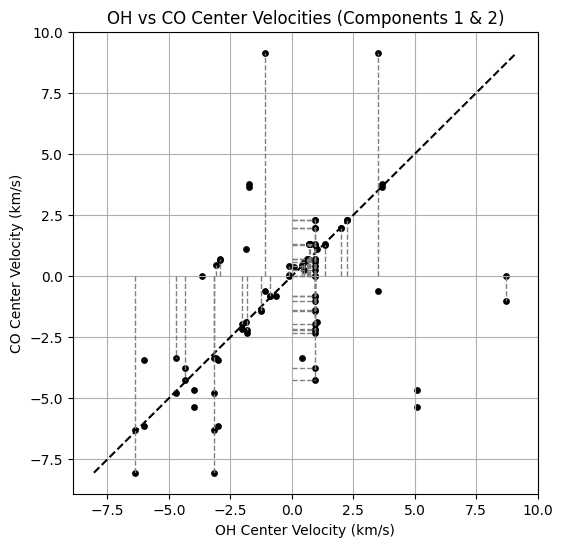

In [115]:
# Filter for only components 1 and 2
subset_df = merged_df_b19[merged_df_b19['comp'].isin([1, 2])]

# Extract OH and CO center velocities along with Upper Limit flags
oh_vel = subset_df[subset_df['line'] == '67'][['l','b','CenterVel (km/s)','Upper Limit']].rename(
    columns={'CenterVel (km/s)':'OH_CenterVel','Upper Limit':'OH_Upper'}
)
co_vel = subset_df[subset_df['line'] == 'CO'][['l','b','CenterVel (km/s)','Upper Limit']].rename(
    columns={'CenterVel (km/s)':'CO_CenterVel','Upper Limit':'CO_Upper'}
)

# Merge so each row has both OH and CO velocities + upper limit flags
vel_df = oh_vel.merge(co_vel, on=['l','b'], how='inner')

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(vel_df['OH_CenterVel'], vel_df['CO_CenterVel'], color='black', s=15)

# 1:1 line
vmin = min(vel_df['OH_CenterVel'].min(), vel_df['CO_CenterVel'].min())
vmax = max(vel_df['OH_CenterVel'].max(), vel_df['CO_CenterVel'].max())
plt.plot([vmin, vmax], [vmin, vmax], '--', color='black')

# Upper limit guide lines
for _, row in vel_df.iterrows():
    if row['OH_Upper'] == 'T':  # OH is an upper limit → horizontal line
        plt.plot([0, row['OH_CenterVel']], [row['CO_CenterVel'], row['CO_CenterVel']],
                 ls='dashed', color='gray', linewidth=1)
    if row['CO_Upper'] == 'T':  # CO is an upper limit → vertical line
        plt.plot([row['OH_CenterVel'], row['OH_CenterVel']], [0, row['CO_CenterVel']],
                 ls='dashed', color='gray', linewidth=1)

plt.xlabel('OH Center Velocity (km/s)')
plt.ylabel('CO Center Velocity (km/s)')
plt.title('OH vs CO Center Velocities (Components 1 & 2)')
plt.grid(True)
plt.show()

In [8]:
#filtering fitcoord dataframe
fitcoord_df_filtered = fitcoord_df[fitcoord_df['Upper Limit'] == 'F']




#assigning OH67 only
OH67_NoUpLim_df = fitcoord_df_filtered[fitcoord_df_filtered['line'] == '67']
OH67_NoUpLim_df = OH67_NoUpLim_df[OH67_NoUpLim_df['comp'] == 1] #only use first gaussian components

OH67_2ndcomp_df = fitcoord_df[fitcoord_df['line'] == '67']
OH67_2ndcomp_df = OH67_2ndcomp_df[OH67_2ndcomp_df['comp'] == 2]

WOH67a = OH67_NoUpLim_df['integral'].to_numpy()
sigWOH67a = OH67_NoUpLim_df['integral error'].to_numpy()

OH65_NoUpLim_df = fitcoord_df_filtered[fitcoord_df_filtered['line'] == '65']
OH65_NoUpLim_df = OH65_NoUpLim_df[OH65_NoUpLim_df['comp'] == 1]
WOH65a = OH65_NoUpLim_df['integral'].to_numpy()
sigWOH65a = OH65_NoUpLim_df['integral error'].to_numpy()


#Total integrals:
OH65comp1and2df = merged_df_b19[merged_df_b19['line'] == '65']
OH67comp1and2df = merged_df_b19[merged_df_b19['line']=='67']

WOH67 = OH67comp1and2df['integral'].to_numpy()
WOH65 = OH65comp1and2df['integral'].to_numpy()
sigWOH67 = OH67comp1and2df['integral error'].to_numpy()
sigWOH65 = OH65comp1and2df['integral error'].to_numpy()



#gathering FWHM into numpy array
FWHM67_NoUpLim_arr = OH67_NoUpLim_df['FWHM (km/s)'].to_numpy()
FWHM67_2ndcomp_arr = OH67_2ndcomp_df['FWHM (km/s)'].to_numpy()

#filtering bayestar dataframe
cloud_depth = b19df['FWHM [pc]'].to_numpy() #depth is FWHM
voldens = b19df['Volume Density [cm^-3]'].to_numpy()

#cloud_depth
OH67_NoUpLim_df

OH67_lat = OH67_NoUpLim_df['l (deg)'].to_numpy()

WOH67 = OH67_NoUpLim_df['integral'].to_numpy()


#CO Dataframe
CO_NoUpLim_df = fitcoord_df_filtered[fitcoord_df_filtered['line'] == 'CO']
CO_NoUpLim_df = CO_NoUpLim_df[CO_NoUpLim_df['comp'] == 1]

CO_2ndcomp_df = fitcoord_df[fitcoord_df['line'] == 'CO']
CO_2ndcomp_df = CO_2ndcomp_df[CO_2ndcomp_df['comp'] == 2]

WCO = CO_NoUpLim_df['integral'].to_numpy()
sigWCO = CO_NoUpLim_df['integral error'].to_numpy()



FWHMCO_NoUpLim_arr = CO_NoUpLim_df['FWHM (km/s)'].to_numpy()
FWHMCO_2ndcomp_arr = CO_2ndcomp_df['FWHM (km/s)'].to_numpy()

avgsigFWHMCO = np.mean(CO_NoUpLim_df['FWHM error (km/s)'].to_numpy())

avgsigWCO = np.mean(sigWCO)


#Av array
max_Av_arr = b19df['Total Av [mag]'].to_numpy()

#coldens array
col_dens = b19df['Column Density [cm^-2]'].to_numpy()







In [9]:
# Second component data for OH67 and CO
OH67_2ndcomp_df = fitcoord_df[fitcoord_df['line'] == '67']
CO_2ndcomp_df = fitcoord_df[fitcoord_df['line'] == 'CO']

OH67_2ndcomp_all = OH67_2ndcomp_df[OH67_2ndcomp_df['comp'] == 2]
CO_2ndcomp_all = CO_2ndcomp_df[CO_2ndcomp_df['comp'] == 2]

# Split second components by Upper Limit
OH67_2ndcomp_T = OH67_2ndcomp_all[OH67_2ndcomp_all['Upper Limit'] == 'T']
OH67_2ndcomp_F = OH67_2ndcomp_all[OH67_2ndcomp_all['Upper Limit'] == 'F']

CO_2ndcomp_T = CO_2ndcomp_all[CO_2ndcomp_all['Upper Limit'] == 'T']
CO_2ndcomp_F = CO_2ndcomp_all[CO_2ndcomp_all['Upper Limit'] == 'F']

WOH67_2nd = OH67_2ndcomp_all['integral'].to_numpy()
sigWOH67_2nd = OH67_2ndcomp_all['integral error'].to_numpy()

WCO_2ndcomp = CO_2ndcomp_all['integral'].to_numpy()
sigWCO_2ndcomp = CO_2ndcomp_all['integral error'].to_numpy()

In [10]:
OH67_2ndcomp_all

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit,l_scaled,b_scaled
187,119070,2800,67,2,0.002166,1.341989e-01,0.925883,2.182562e-01,0.925883,2.007209e-01,0.002390,0.000081,Polaris,T,119.07,28.00
8,119210,2000,67,2,0.038055,4.090330e-03,0.625262,7.236123e-02,0.747978,9.809247e-02,0.070404,0.004225,Polaris,F,119.21,20.00
68,120500,1863,67,2,0.002454,4.368397e-01,0.925877,2.538576e-01,0.925877,2.275303e-01,0.002433,0.000076,Polaris,T,120.50,18.63
156,120500,2963,67,2,0.030204,3.895034e-03,-6.391253,9.019945e-02,0.627039,1.064189e-01,0.057774,0.003361,Polaris,F,120.50,29.63
27,121070,2175,67,2,0.036667,1.935286e-03,-3.012140,2.877390e-01,2.051273,2.466191e-01,0.279769,0.006831,Polaris,F,121.07,21.75
195,121930,1975,67,2,0.018097,3.605250e+02,0.727192,6.760806e+02,0.140004,2.907260e+03,0.019814,0.002425,Polaris,F,121.93,19.75
168,122220,1875,67,2,0.002169,4.832427e+07,0.925876,3.658915e+07,0.925876,3.987894e+07,0.001742,0.000218,Polaris,T,122.22,18.75
96,123500,1963,67,2,0.034361,2.179510e-03,-3.964759,1.087427e-01,1.484738,1.087659e-01,0.113258,0.004498,Polaris,F,123.50,19.63
79,125070,1950,67,2,0.002786,7.189974e-01,0.925884,1.954554e-01,0.925884,3.081601e-01,0.001729,0.000057,Polaris,T,125.07,19.50
35,125500,2200,67,2,0.016239,3.111030e-03,-3.185540,4.768085e-01,2.474596,3.344869e-01,0.190477,0.005465,Polaris,F,125.50,22.00


In [11]:
CO_2ndcomp_all 

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit,l_scaled,b_scaled
191,119070,2800,CO,2,0.147463,1.341989e-01,-4.251790,2.182562e-01,1.081164,2.007209e-01,0.127674,0.011476,Polaris,T,119.07,28.00
14,119210,2000,CO,2,0.128976,4.691580e-01,0.695469,1.567580e-01,1.411649,1.658279e-01,0.094484,0.024550,Polaris,T,119.21,20.00
74,120500,1863,CO,2,0.114742,4.368397e-01,-0.806004,2.538576e-01,0.882485,2.275303e-01,0.079258,0.004196,Polaris,T,120.50,18.63
162,120500,2963,CO,2,0.128479,3.994189e-01,-8.052769,1.631625e-01,0.176147,1.238697e-01,0.072390,0.007205,Polaris,T,120.50,29.63
31,121070,2175,CO,2,1.935919,9.197702e-02,-3.416223,2.341359e-01,1.650386,1.963826e-01,9.839554,0.237369,Polaris,F,121.07,21.75
199,121930,1975,CO,2,0.168991,6.573203e-01,1.298861,4.606207e-01,0.255005,4.250255e-01,0.096217,0.021265,Polaris,T,121.93,19.75
174,122220,1875,CO,2,0.122617,4.832427e+07,1.981341,3.658915e+07,1.154046,3.987894e+07,0.023547,17.109760,Polaris,T,122.22,18.75
102,123500,1963,CO,2,0.405458,2.190852e-01,-5.356172,2.232577e-01,0.466681,2.986366e-01,1.028077,0.171166,Polaris,F,123.50,19.63
83,125070,1950,CO,2,0.143473,7.189974e-01,0.686141,1.954554e-01,0.555600,3.081601e-01,0.086334,0.007591,Polaris,T,125.07,19.50
39,125500,2200,CO,2,0.039544,3.776983e-01,-3.344340,9.236290e-02,2.205602,1.114424e-01,0.036027,0.001704,Polaris,T,125.50,22.00


In [12]:
CO_NoUpLim_df

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit,l_scaled,b_scaled
190,119070,2800,CO,1,1.613065,0.125558,-3.779779,0.077823,0.865799,0.077823,2.944761,0.191762,Polaris,F,119.07,28.00
13,119210,2000,CO,1,0.640718,0.144064,0.650001,0.190147,0.732573,0.190346,1.091302,0.167720,Polaris,F,119.21,20.00
73,120500,1863,CO,1,2.971228,0.136213,-0.813725,0.036567,0.690755,0.036565,4.413615,0.129220,Polaris,F,120.50,18.63
161,120500,2963,CO,1,1.475331,0.128105,-6.307529,0.057041,0.563438,0.056081,1.961752,0.144690,Polaris,F,120.50,29.63
30,121070,2175,CO,1,3.861263,0.274407,-6.122722,0.043057,0.780494,0.048677,7.105254,0.145358,Polaris,F,121.07,21.75
198,121930,1975,CO,1,0.859033,0.160622,1.332860,0.119604,0.569361,0.125836,0.947458,0.155391,Polaris,F,121.93,19.75
173,122220,1875,CO,1,2.180083,4531.807293,1.964676,19.728925,0.192040,139.538583,0.000000,0.000000,Polaris,F,122.22,18.75
101,123500,1963,CO,1,0.527672,0.186162,-4.651496,0.416294,1.433705,0.298391,2.029244,0.171166,Polaris,F,123.50,19.63
82,125070,1950,CO,1,1.962675,0.147545,0.680557,0.051534,0.601743,0.052906,2.210882,0.131926,Polaris,F,125.07,19.50
219,125220,3250,CO,1,0.863866,0.103696,0.389683,0.137698,0.993339,0.137698,1.873039,0.167259,Polaris,F,125.22,32.50


In [13]:
print(len(fitcoord_df))               # total rows
print(len(fitcoord_df_filtered))      # rows with Upper Limit == 'F'
print(len(OH67_NoUpLim_df))           # rows with '67' and Upper Limit == 'F'

220
153
26


In [14]:
OH67_NoUpLim_df
#122500, 123360, 

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit,l_scaled,b_scaled
186,119070,2800,67,1,0.086602,0.002528,-4.358241,0.037192,1.103239,0.037201,0.215733,0.004011,Polaris,F,119.07,28.00
7,119210,2000,67,1,0.014840,0.001629,-2.937418,0.619626,2.897268,0.516489,0.155027,0.008963,Polaris,F,119.21,20.00
67,120500,1863,67,1,0.098978,0.002665,-0.888053,0.030852,0.991228,0.030783,0.206374,0.003936,Polaris,F,120.50,18.63
155,120500,2963,67,1,0.014573,0.001616,-3.185757,0.551556,3.041890,0.444251,0.145395,0.007514,Polaris,F,120.50,29.63
26,121070,2175,67,1,0.122156,0.005057,-6.000257,0.023290,0.666134,0.046169,0.199738,0.003652,Polaris,F,121.07,21.75
194,121930,1975,67,1,0.017690,233.070543,0.716072,688.794174,0.138198,2974.886891,0.019814,0.002425,Polaris,F,121.93,19.75
167,122220,1875,67,1,0.027175,0.002953,1.999606,0.101372,0.803392,0.100404,0.049718,0.003478,Polaris,F,122.22,18.75
95,123500,1963,67,1,0.008113,0.002100,5.086275,0.478077,1.599966,0.478184,0.025929,0.004498,Polaris,F,123.50,19.63
78,125070,1950,67,1,0.106404,0.003160,0.660790,0.024930,0.620396,0.020450,0.139287,0.003648,Polaris,F,125.07,19.50
217,125220,3250,67,1,0.120393,0.002593,0.069041,0.026084,1.048728,0.026070,0.261557,0.003814,Polaris,F,125.22,32.50


Text(0, 0.5, 'CO Peak Temperature [K]')

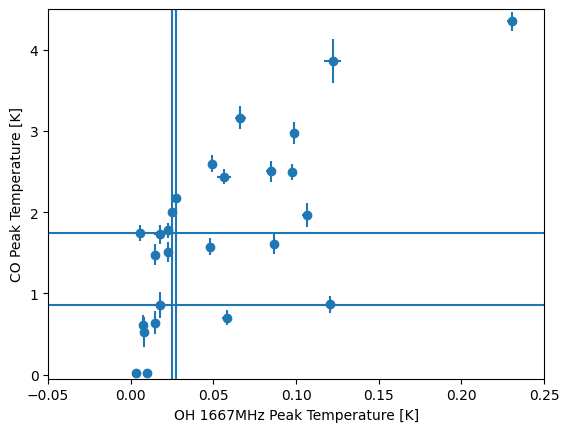

In [15]:
T_CO_Bright = CO_NoUpLim_df['T_peak (K)'].to_numpy()
T_CO_Bright_err = CO_NoUpLim_df['T_error (K)'].to_numpy()
T_CO_OH_Bright = OH67_NoUpLim_df['T_peak (K)'].to_numpy()
T_CO_OH_Bright_err = OH67_NoUpLim_df['T_error (K)'].to_numpy()

LSR_CO_Bright = CO_NoUpLim_df['CenterVel (km/s)'].to_numpy()
LSR_CO_Bright_err = CO_NoUpLim_df['CenterVel_error (km/s)'].to_numpy()
LSR_CO_OH_Bright = OH67_NoUpLim_df['CenterVel (km/s)'].to_numpy()
LSR_CO_OH_Bright_err = OH67_NoUpLim_df['CenterVel_error (km/s)'].to_numpy()

plt.errorbar(T_CO_OH_Bright, T_CO_Bright, xerr = T_CO_OH_Bright_err, yerr = T_CO_Bright_err, fmt = 'o')
plt.xlim(-0.05, 0.25)
plt.ylim(-0.05, 4.5)
plt.xlabel('OH 1667MHz Peak Temperature [K]')
plt.ylabel('CO Peak Temperature [K]')
#plt.scatter(T_CO_OH_Bright, T_CO_Bright)

Text(0, 0.5, 'OH 1667MHz LSR Velocity [km/s]')

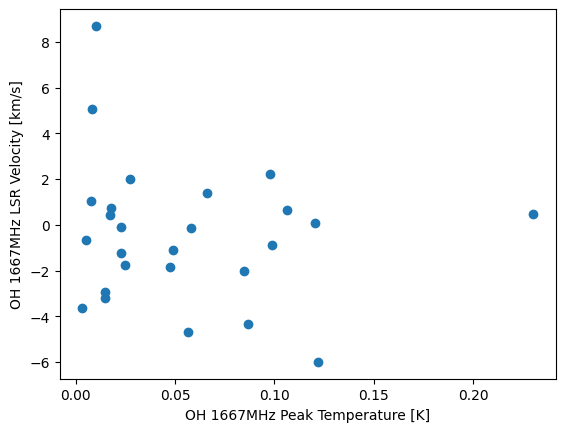

In [16]:
plt.scatter(T_CO_OH_Bright, LSR_CO_OH_Bright)
plt.xlabel('OH 1667MHz Peak Temperature [K]')
plt.ylabel('OH 1667MHz LSR Velocity [km/s]')

#label these by cloud

Text(0, 0.5, 'CO LSR Velocity [km/s]')

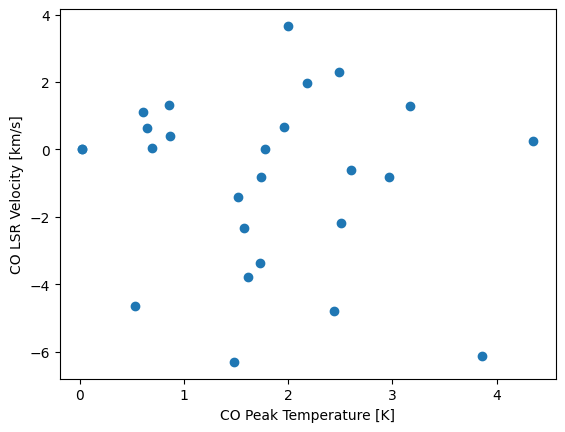

In [17]:

plt.scatter(T_CO_Bright, LSR_CO_Bright)
plt.xlabel('CO Peak Temperature [K]')
plt.ylabel('CO LSR Velocity [km/s]')

#label these by cloud

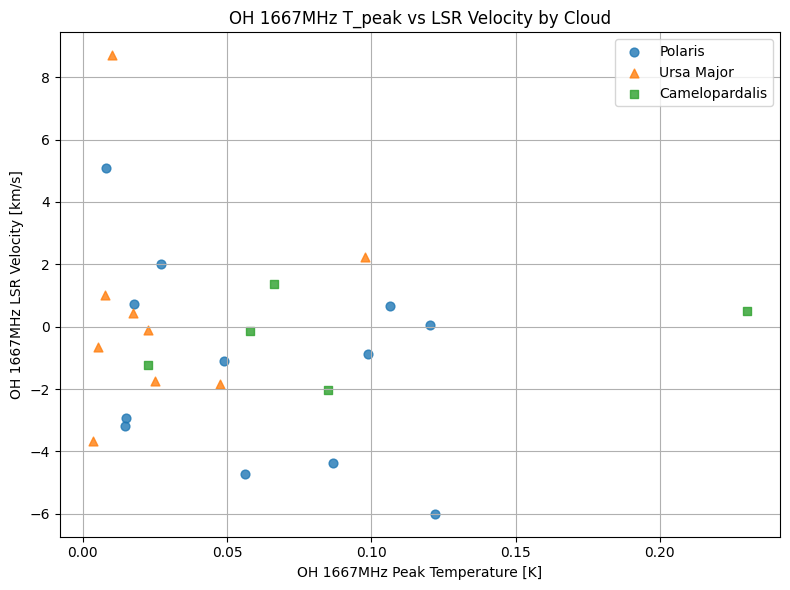

In [18]:
# Unique clouds and markers
unique_clouds = OH67_NoUpLim_df['Cloud'].unique()
markers = ['o', '^', 's', 'D', 'v', 'P', '*']  # Add more if needed

plt.figure(figsize=(8, 6))

for i, cloud in enumerate(unique_clouds):
    subdf = OH67_NoUpLim_df[OH67_NoUpLim_df['Cloud'] == cloud]
    marker = markers[i % len(markers)]
    
    plt.scatter(
        subdf['T_peak (K)'],
        subdf['CenterVel (km/s)'],
        marker=marker,
        label=cloud,
        s=40,
        alpha=0.8
    )

plt.xlabel('OH 1667MHz Peak Temperature [K]')
plt.ylabel('OH 1667MHz LSR Velocity [km/s]')
plt.title('OH 1667MHz T_peak vs LSR Velocity by Cloud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



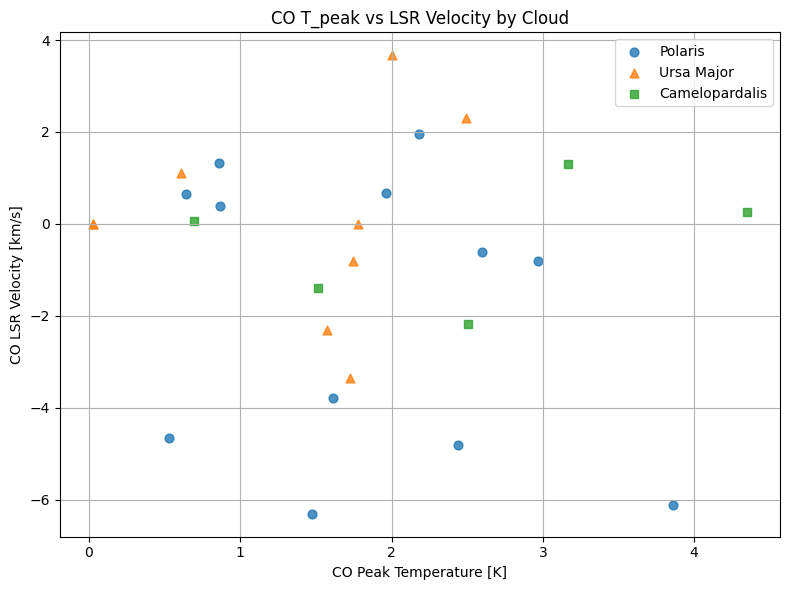

In [19]:
# Unique clouds and markers
unique_clouds = CO_NoUpLim_df['Cloud'].unique()
markers = ['o', '^', 's', 'D', 'v', 'P', '*']  # Add more as needed

plt.figure(figsize=(8, 6))

for i, cloud in enumerate(unique_clouds):
    subdf = CO_NoUpLim_df[CO_NoUpLim_df['Cloud'] == cloud]
    marker = markers[i % len(markers)]
    
    plt.scatter(
        subdf['T_peak (K)'],
        subdf['CenterVel (km/s)'],
        label=cloud,
        marker=marker,
        s=40,
        alpha=0.8
    )

plt.xlabel('CO Peak Temperature [K]')
plt.ylabel('CO LSR Velocity [km/s]')
plt.title('CO T_peak vs LSR Velocity by Cloud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
lat_b19_scaled = np.round(b19df['l'] * 1000).astype(int)
OH67_lat_scaled = np.round(OH67_NoUpLim_df['l (deg)']).astype(int)

missing = set(lat_b19_scaled)-set(OH67_lat_scaled)
print(missing)

set()


26
26


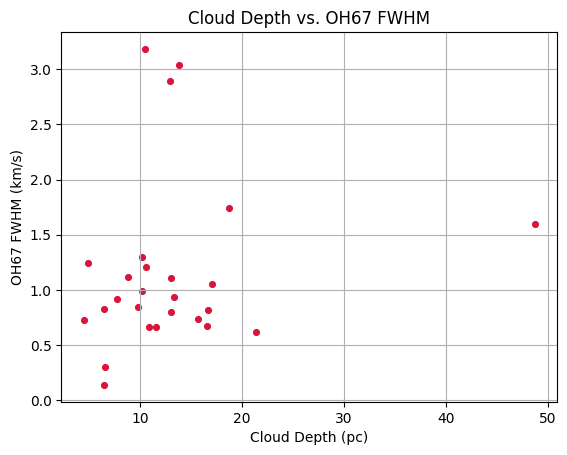

In [21]:
#Plot for depth v. FWHM
print(len(cloud_depth))
print(len(FWHM67_NoUpLim_arr))
plt.scatter(cloud_depth, FWHM67_NoUpLim_arr, s=17, color = 'crimson')
plt.xlabel('Cloud Depth (pc)')
plt.ylabel('OH67 FWHM (km/s)')
plt.title('Cloud Depth vs. OH67 FWHM')
plt.grid(True)


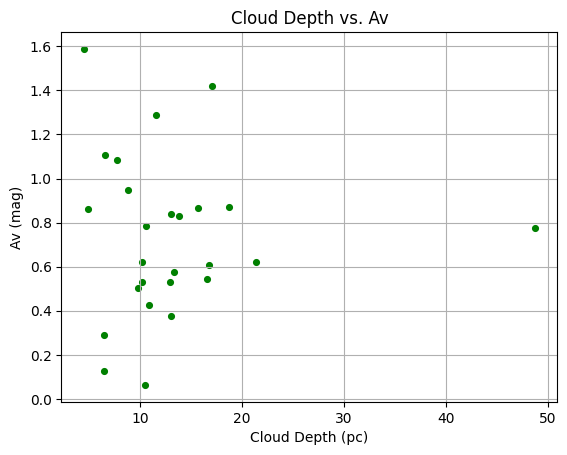

In [22]:
#Plot for depth v. Av
plt.scatter(cloud_depth, max_Av_arr, s=17, color = 'green')
plt.xlabel('Cloud Depth (pc)')
plt.ylabel('Av (mag)')
plt.title('Cloud Depth vs. Av')
plt.grid(True)

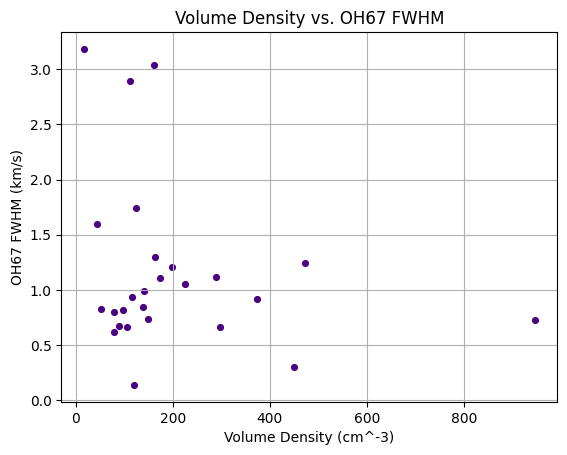

In [23]:
#Plot for depth v. FWHM

plt.scatter(voldens, FWHM67_NoUpLim_arr, s=17, color = 'indigo')
plt.xlabel('Volume Density (cm^-3)')
plt.ylabel('OH67 FWHM (km/s)')
plt.title('Volume Density vs. OH67 FWHM')
plt.grid(True)

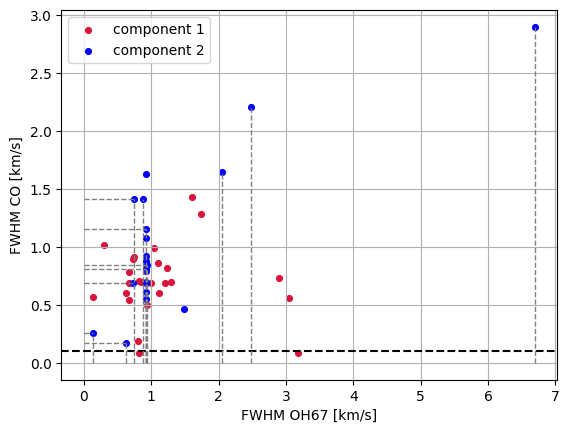

In [24]:
plt.scatter(FWHM67_NoUpLim_arr, FWHMCO_NoUpLim_arr, color='crimson', s=17, label='component 1')
plt.scatter(FWHM67_2ndcomp_arr, FWHMCO_2ndcomp_arr, color='blue', s=17, label='component 2')

plt.grid(True)
plt.xlabel('FWHM OH67 [km/s]')
plt.ylabel('FWHM CO [km/s]')
plt.axhline(0.1, color='black', ls='dashed')
plt.legend()

# Determine the number of data points to loop over safely
n_points = min(len(FWHM67_2ndcomp_arr), len(FWHMCO_2ndcomp_arr), len(OH67_2ndcomp_df), len(CO_2ndcomp_df))

# Loop through the points to draw guide lines for upper limits
for i in range(n_points):
    # Check if OH67 is an upper limit
    is_upper_limit_OH67 = OH67_2ndcomp_df.iloc[i]['Upper Limit'] == 'T'
    # Check if CO is an upper limit
    is_upper_limit_CO = CO_2ndcomp_df.iloc[i]['Upper Limit'] == 'T'

    # Get the FWHM values for plotting
    x = FWHM67_2ndcomp_arr[i]
    y = FWHMCO_2ndcomp_arr[i]

    # If OH67 is an upper limit, draw a horizontal line across to the measured CO value
    if is_upper_limit_OH67:
        plt.plot([0, x], [y, y], ls='dashed', color='gray', linewidth=1)
    # If CO is an upper limit, draw a vertical line up to the measured OH67 value
    if is_upper_limit_CO:
        plt.plot([x, x], [0, y], ls='dashed', color='gray', linewidth=1)

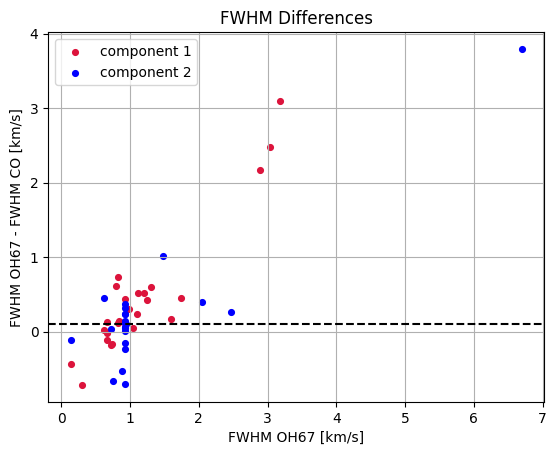

In [25]:

#for the primary components (no upper limits)
FWHM_diff_primary = np.array(FWHM67_NoUpLim_arr) - np.array(FWHMCO_NoUpLim_arr)


#second components
FWHM_diff_2nd = np.array(FWHM67_2ndcomp_arr) - np.array(FWHMCO_2ndcomp_arr)


plt.scatter(FWHM67_NoUpLim_arr, FWHM_diff_primary, color = 'crimson', s = 17, label = 'component 1')
plt.scatter(FWHM67_2ndcomp_arr, FWHM_diff_2nd, color = 'blue', s = 17, label = 'component 2')
# Add dashed guide lines for points where either line is an upper limit
plt.grid(True)
plt.xlabel('FWHM OH67 [km/s]')
plt.ylabel('FWHM OH67 - FWHM CO [km/s]')
plt.title('FWHM Differences')
plt.axhline(0.1, color = 'black', ls = 'dashed')
plt.legend()

# Determine the number of data points to loop over safely
n_points = min(len(FWHM67_2ndcomp_arr), len(FWHMCO_2ndcomp_arr), len(OH67_2ndcomp_df), len(CO_2ndcomp_df))

#if greater than 0, then more OH than CO, if less than 0, more CO than OH

In [26]:
print(OH67_2ndcomp_df.columns)

Index(['l (deg)', 'b (deg)', 'line', 'comp', 'T_peak (K)', 'T_error (K)',
       'CenterVel (km/s)', 'CenterVel_error (km/s)', 'FWHM (km/s)',
       'FWHM error (km/s)', 'integral', 'integral error', 'Cloud',
       'Upper Limit', 'l_scaled', 'b_scaled'],
      dtype='object')


In [27]:
plot_df = pd.DataFrame({
    'WOH67': WOH67,
    'WCO': WCO,
    'sigWCO': sigWCO,
    'Cloud': CO_NoUpLim_df['Cloud'].values,  # assumes same order
    'col_dens': col_dens,  # assumes b19df aligns row-wise
    'max_Av_arr': max_Av_arr,
    'vol_dens': voldens
})

In [28]:
OH67comp1and2df = merged_df_b19[merged_df_b19['line']=='67']

WOH67_both = OH67comp1and2df['integral'].to_numpy()
sigWOH67_both = OH67comp1and2df['integral error'].to_numpy()

COcomp1and2df = merged_df_b19[merged_df_b19['line']=='CO']
WCO_both = COcomp1and2df['integral'].to_numpy()
sigWCO_both = COcomp1and2df['integral error'].to_numpy()

voldens_both = COcomp1and2df['Volume Density [cm^-3]'].to_numpy()
col_dens_both = COcomp1and2df['Column Density [cm^-2]'].to_numpy()
total_Av_both = COcomp1and2df['Total Av [mag]'].to_numpy()

In [29]:
print(len(WOH67_both))
print(len(WCO_both))
print(len(sigWCO_both))
print(len(COcomp1and2df['Cloud'].values))
print(len(col_dens_both))
print(len(total_Av_both))
print(len(voldens_both))

55
55
55
55
55
55
55


In [30]:
plot_df2 = pd.DataFrame({
    'WOH67': WOH67_both,
    'WCO': WCO_both,
    'sigWCO': sigWCO_both,
    'Cloud': COcomp1and2df['Cloud'].values,  # assumes same order
    'col_dens': col_dens_both,  # assumes b19df aligns row-wise
    'max_Av_arr': total_Av_both,
    'vol_dens': voldens_both
})    


print(len(plot_df2['WOH67']))

55


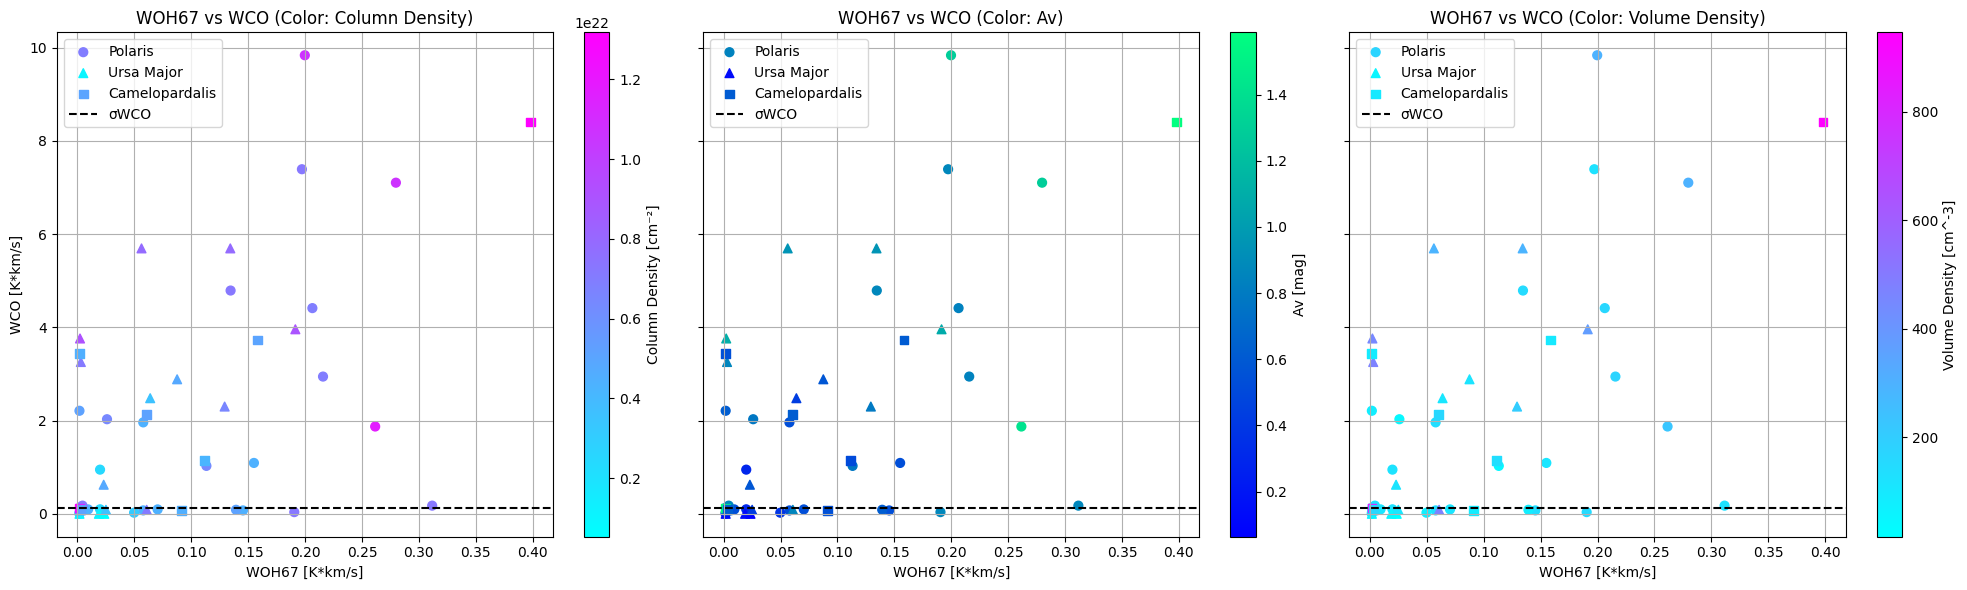

In [31]:
#----------Adding 2nd and 3rd Components to the Latter Plot----------

unique_clouds = plot_df2['Cloud'].unique()
markers = ['o', '^', 's']  # Add more if needed

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

vmin_col = plot_df2['col_dens'].min()
vmax_col = plot_df2['col_dens'].max()
vmin_av = plot_df2['max_Av_arr'].min()
vmax_av = plot_df2['max_Av_arr'].max()
vmin_vol = plot_df2['vol_dens'].min()
vmax_vol = plot_df2['vol_dens'].max()

for i, cloud in enumerate(unique_clouds):
    subdf2 = plot_df2[plot_df2['Cloud'] == cloud]
    marker = markers[i % len(markers)]

    sc1 = ax1.scatter(subdf2['WOH67'], subdf2['WCO'], c=subdf2['col_dens'],
                      cmap='cool', s=40, marker=marker, label=cloud,
                      vmin=vmin_col, vmax=vmax_col)
    
    sc2 = ax2.scatter(subdf2['WOH67'], subdf2['WCO'], c=subdf2['max_Av_arr'],
                      cmap='winter', s=40, marker=marker, label=cloud,
                      vmin=vmin_av, vmax=vmax_av)
    sc3 = ax3.scatter(subdf2['WOH67'], subdf2['WCO'], c=subdf2['vol_dens'],
                      cmap='cool', s=40, marker=marker, label=cloud,
                      vmin=vmin_vol, vmax=vmax_vol)

# Add colorbars
cb1 = fig.colorbar(sc1, ax=ax1)
cb1.set_label('Column Density [cm⁻²]')
cb2 = fig.colorbar(sc2, ax=ax2)
cb2.set_label('Av [mag]')
cb3 = fig.colorbar(sc3, ax=ax3)
cb3.set_label('Volume Density [cm^-3]')

# Horizontal lines
ax1.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')
ax2.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')
ax3.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')

# Titles, labels, etc.
ax1.set_title('WOH67 vs WCO (Color: Column Density)')
ax1.set_xlabel('WOH67 [K*km/s]')
ax1.set_ylabel('WCO [K*km/s]')
ax1.grid(True)
ax1.legend()

ax2.set_title('WOH67 vs WCO (Color: Av)')
ax2.set_xlabel('WOH67 [K*km/s]')
ax2.grid(True)
ax2.legend()

ax3.set_title('WOH67 vs WCO (Color: Volume Density)')
ax3.set_xlabel('WOH67 [K*km/s]')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()

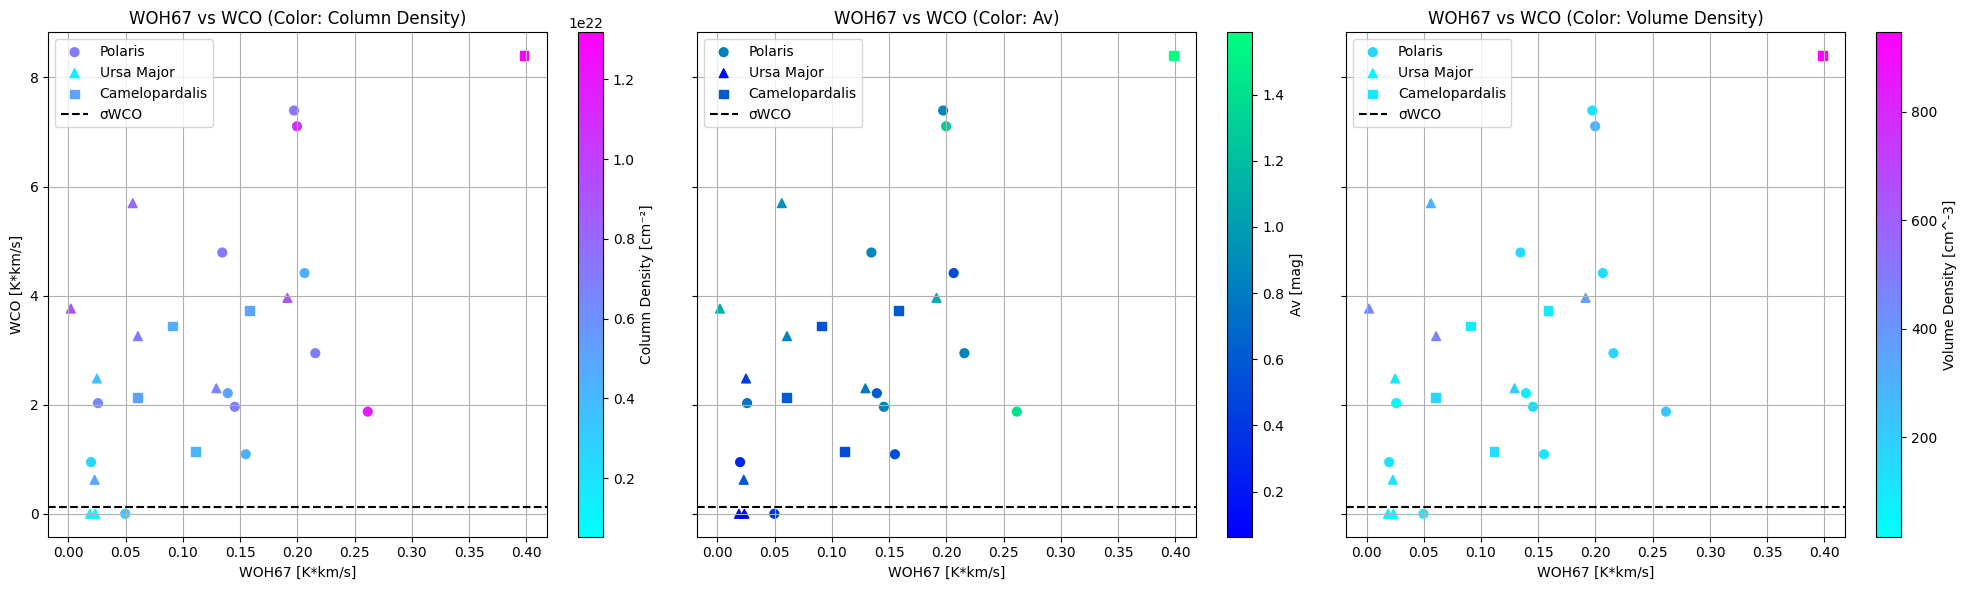

In [32]:
unique_clouds = plot_df['Cloud'].unique()
markers = ['o', '^', 's']  # Add more if needed

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

vmin_col = plot_df['col_dens'].min()
vmax_col = plot_df['col_dens'].max()
vmin_av = plot_df['max_Av_arr'].min()
vmax_av = plot_df['max_Av_arr'].max()
vmin_vol = plot_df['vol_dens'].min()
vmax_vol = plot_df['vol_dens'].max()

for i, cloud in enumerate(unique_clouds):
    subdf = plot_df[plot_df['Cloud'] == cloud]
    marker = markers[i % len(markers)]

    sc1 = ax1.scatter(subdf['WOH67'], subdf['WCO'], c=subdf['col_dens'],
                      cmap='cool', s=40, marker=marker, label=cloud,
                      vmin=vmin_col, vmax=vmax_col)
    
    sc2 = ax2.scatter(subdf['WOH67'], subdf['WCO'], c=subdf['max_Av_arr'],
                      cmap='winter', s=40, marker=marker, label=cloud,
                      vmin=vmin_av, vmax=vmax_av)
    sc3 = ax3.scatter(subdf['WOH67'], subdf['WCO'], c=subdf['vol_dens'],
                      cmap='cool', s=40, marker=marker, label=cloud,
                      vmin=vmin_vol, vmax=vmax_vol)

# Add colorbars
cb1 = fig.colorbar(sc1, ax=ax1)
cb1.set_label('Column Density [cm⁻²]')
cb2 = fig.colorbar(sc2, ax=ax2)
cb2.set_label('Av [mag]')
cb3 = fig.colorbar(sc3, ax=ax3)
cb3.set_label('Volume Density [cm^-3]')

# Horizontal lines
ax1.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')
ax2.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')
ax3.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')

# Titles, labels, etc.
ax1.set_title('WOH67 vs WCO (Color: Column Density)')
ax1.set_xlabel('WOH67 [K*km/s]')
ax1.set_ylabel('WCO [K*km/s]')
ax1.grid(True)
ax1.legend()

ax2.set_title('WOH67 vs WCO (Color: Av)')
ax2.set_xlabel('WOH67 [K*km/s]')
ax2.grid(True)
ax2.legend()

ax3.set_title('WOH67 vs WCO (Color: Volume Density)')
ax3.set_xlabel('WOH67 [K*km/s]')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()

## WCO and WOH --> N(OH) vs W(CO) --> N(H2_OH) vs N(H2_CO)

### Equations (Found from Bolatto 2013, Busch 2024, and Busch 2019):

$$ X_{CO} = \frac{N(H_2)}{(W(CO))} $$

$$N(OH) = C\frac{T_{ex}}{T_{ex}-T_c} \int T_b(\nu)d\nu $$ 

where $ \int T_b(\nu)d\nu $ is WOH.

$$ T_{ex} = 5K, T_c = 3K$$

Median Literature Value for N(OH)/N(H2) Ratio: $$\frac{N_{OH}}{N_{H2}} = 1\times 10^{-7}$$

N(H2) from CO: $$N(H_{2, CO}) = X_{CO}W(CO),$$ note this is the J = 0 to 1 transition. 


We use the XCO Factor for the Milky Way from Busch 2024 (via Bolatto 2013): $$X_{CO} = 2\times 10^{20} cm^{-2}$$



In [55]:
#Define Constants:
XCO = 2*10**20
C1667 = 2.3*10**14
#C1665 = same???

#calculate N(OH)
def NOHfinder(Tex, Tc, WOH):
    NOH = C1667*Tex/(Tex-Tc) * WOH
    return NOH

#Calculate NH2_OH
def NH2viaOH(NOH):
    NH2OH = NOH*(10**7)
    return NH2OH

#Calculate NH2_CO
def NH2viaCO(WCO):
    NH2CO = XCO*WCO
    return NH2CO



In [56]:
NOH_arr = NOHfinder(5, 3, WOH67)

NOH_arr_comp2 = NOHfinder(5, 3, WOH67_2nd)

NH2_OH_arr = NH2viaOH(NOH_arr)
NH2_OH_arr_comp2 = NH2viaOH(NOH_arr_comp2)

NH2_CO_arr = NH2viaCO(WCO) 
NH2_CO_arr_comp2 = NH2viaCO(WCO_2ndcomp)


#errors:
NOH_err_1 = NOHfinder(5, 3, sigWOH67)
NOH_err_2 = NOHfinder(5, 3, sigWOH67_2nd)

NH2_OH_err1 = NH2viaOH(NOH_err_1)
NH2_OH_err2 = NH2viaOH(NOH_err_2)

NH2_CO_err = NH2viaCO(sigWCO) 
NH2_CO_err2 = NH2viaCO(sigWCO_2ndcomp)


print(NH2_OH_err2)

[4.63376130e+17 2.42943453e+19 4.34401613e+17 1.93232975e+19
 3.92811092e+19 1.39411807e+19 1.25201483e+18 2.58636918e+19
 3.27623591e+17 3.14255406e+19 6.17519451e+19 3.39490610e+18
 4.72411587e+17 4.19332257e+17 1.48674699e+17 2.05087620e+18
 2.59057641e+19 2.14568195e+19 1.00984059e+18 5.18708743e+17
 2.06992581e+18 2.09156743e+19]


In [57]:
b19df

,l,b,Total Av [mag],Distance of Max Av [pc],FWHM [pc],Column Density [cm^-2],Volume Density [cm^-3],Max Av [mag]
12,119.07,28.00,0.839006,[356.36623748],13.029773,6.963747e+21,173.203073,NaN
8,119.21,20.00,0.531475,[300.28612303],12.939459,4.411245e+21,110.482763,NaN
10,120.50,29.63,0.528482,[336.33762518],10.189696,4.386398e+21,139.507089,NaN
14,120.50,18.63,0.831956,[283.26180258],13.833790,6.905236e+21,161.765830,NaN
24,121.07,21.75,1.286214,[300.28612303],11.611080,1.067558e+22,297.967099,NaN
18,121.93,19.75,0.291662,[267.23891273],6.506199,2.420799e+21,120.581529,NaN
23,122.22,18.75,0.377041,[300.28612303],13.016710,3.129443e+21,77.913963,NaN
17,123.50,19.63,0.776805,[356.36623748],48.718866,6.447486e+21,42.888678,NaN
11,125.07,19.50,0.623008,[267.23891273],21.377317,5.170963e+21,78.391268,NaN
0,125.22,32.50,1.419756,[336.33762518],17.044796,1.178397e+22,224.052300,NaN


In [58]:
# First Component
df1 = pd.DataFrame({
    'l': l_array,                 # Galactic longitude for component 1
    'b': b_array,                 # Galactic latitude for component 1
    'NH2_OH': NH2_OH_arr,
    'NH2_CO': NH2_CO_arr,
    'NH2_OH_err': NH2_OH_err1,
    'NH2_CO_err': NH2_CO_err,
    'volume_density': volume_density_comp1,
    'component': 'Component 1'
})

# Second Component
df2 = pd.DataFrame({
    'l': l_array_2nd,             # Galactic longitude for component 2
    'b': b_array_2nd,             # Galactic latitude for component 2
    'NH2_OH': NH2_OH_arr_comp2,
    'NH2_CO': NH2_CO_arr_comp2,
    'NH2_OH_err': NH2_OH_err2,
    'NH2_CO_err': NH2_CO_err2,
    'volume_density': volume_density_comp2,
    'component': 'Component 2'
})

NameError: name 'l_array' is not defined

In [59]:
sigWOH67_2nd

array([8.05871531e-05, 4.22510354e-03, 7.55481066e-05, 3.36057348e-03,
       6.83149725e-03, 2.42455317e-03, 2.17741710e-04, 4.49803335e-03,
       5.69780158e-05, 5.46531141e-03, 1.07394687e-02, 5.90418452e-04,
       8.21585369e-05, 7.29273490e-05, 2.58564694e-05, 3.56674121e-04,
       4.50535028e-03, 3.73162078e-03, 1.75624450e-04, 9.02102161e-05,
       3.59987097e-04, 3.63750857e-03])

In [60]:
OH67_2ndcomp_all

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit,l_scaled,b_scaled
187,119070,2800,67,2,0.002166,1.341989e-01,0.925883,2.182562e-01,0.925883,2.007209e-01,0.002390,0.000081,Polaris,T,119.07,28.00
8,119210,2000,67,2,0.038055,4.090330e-03,0.625262,7.236123e-02,0.747978,9.809247e-02,0.070404,0.004225,Polaris,F,119.21,20.00
68,120500,1863,67,2,0.002454,4.368397e-01,0.925877,2.538576e-01,0.925877,2.275303e-01,0.002433,0.000076,Polaris,T,120.50,18.63
156,120500,2963,67,2,0.030204,3.895034e-03,-6.391253,9.019945e-02,0.627039,1.064189e-01,0.057774,0.003361,Polaris,F,120.50,29.63
27,121070,2175,67,2,0.036667,1.935286e-03,-3.012140,2.877390e-01,2.051273,2.466191e-01,0.279769,0.006831,Polaris,F,121.07,21.75
195,121930,1975,67,2,0.018097,3.605250e+02,0.727192,6.760806e+02,0.140004,2.907260e+03,0.019814,0.002425,Polaris,F,121.93,19.75
168,122220,1875,67,2,0.002169,4.832427e+07,0.925876,3.658915e+07,0.925876,3.987894e+07,0.001742,0.000218,Polaris,T,122.22,18.75
96,123500,1963,67,2,0.034361,2.179510e-03,-3.964759,1.087427e-01,1.484738,1.087659e-01,0.113258,0.004498,Polaris,F,123.50,19.63
79,125070,1950,67,2,0.002786,7.189974e-01,0.925884,1.954554e-01,0.925884,3.081601e-01,0.001729,0.000057,Polaris,T,125.07,19.50
35,125500,2200,67,2,0.016239,3.111030e-03,-3.185540,4.768085e-01,2.474596,3.344869e-01,0.190477,0.005465,Polaris,F,125.50,22.00


Now, we need to find the average CO-Dark gas N(H2) value. The way to do this would be to first collect all the components of CO-Dark gas. I must create an index where the CO is below some number that we deem CO-Dark, then find the average N(H2) over all those values. 


ValueError: 'x' and 'y' must have the same size

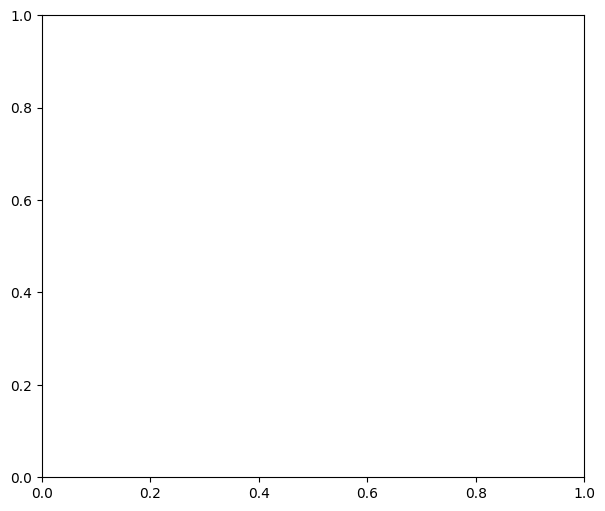

In [61]:
fig, ax = plt.subplots(figsize=(7, 6))

# Component 1: Square markers with error bars
ax.errorbar(
    NH2_OH_arr, NH2_CO_arr,
    xerr=NH2_OH_err1, yerr=NH2_CO_err,
    fmt='s', color='black', markersize=4, label='Component 1',
    ecolor='gray', elinewidth=1, capsize=2
)

# Component 2: Triangle markers with error bars
ax.errorbar(
    NH2_OH_arr_comp2, NH2_CO_arr_comp2,
    xerr=NH2_OH_err2, yerr=NH2_CO_err2,
    fmt='^', color='black', markersize=4, label='Component 2',
    ecolor='gray', elinewidth=1, capsize=2
)

# Styling
ax.grid(True)
ax.set_xlabel('NH$_2$ from OH [cm$^{-2}$]')
ax.set_ylabel('NH$_2$ from CO [cm$^{-2}$]')
ax.set_xlim([-0.5e21, 3e21])
ax.set_ylim([-0.5e21, 3e21])

# 1:1 line and crosshairs at zero
xoneone = np.linspace(0, 3e21)
ax.plot(xoneone, xoneone, color='orange', ls='--', label='1:1 Line')
ax.axhline(0, ls='--', linewidth=1, color='black')
ax.axvline(0, ls='--', linewidth=1, color='black')

# Legend and layout
ax.legend()
plt.tight_layout()
plt.show()

#print(NH2_OH_err2)
#print(NH2_CO_err2)

#add column for volume density to add volume density colorbar

In [87]:
# Constants
XCO = 2e20                         # [cm^-2 (K km/s)^-1]
C1667 = 2.3e14                     # [cm^-2 / (K km/s)]
Tex = 5                           # [K]
Tc = 3               

# Constants
XCO = 2e20
C1667 = 2.3e14
Tex = 5
Tc = 3

# ---------- COMPONENT 1 ----------
filtered_df1 = merged_df_b19[merged_df_b19['comp'] == 1]

OH67_df1 = filtered_df1[filtered_df1['line'] == '67'].copy()
CO_df1 = filtered_df1[filtered_df1['line'] == 'CO'].copy()

OH67_df1['NOH'] = NOHfinder(Tex, Tc, OH67_df1['integral'])
OH67_df1['NH2_OH'] = NH2viaOH(OH67_df1['NOH'])
OH67_df1['NH2_OH_err'] = NH2viaOH(NOHfinder(Tex, Tc, OH67_df1['integral error']))
OH67_df1['component'] = 'Component 1'

CO_df1['NH2_CO'] = NH2viaCO(CO_df1['integral'])
CO_df1['NH2_CO_err'] = NH2viaCO(CO_df1['integral error'])
CO_df1['component'] = 'Component 1'

NH2_df1 = pd.merge(
    OH67_df1[['l', 'b', 'NH2_OH', 'NH2_OH_err', 'Volume Density [cm^-3]', 'Total Av [mag]', 'component', 'Distance of Max Av [pc]', 'Upper Limit', 'Cloud']],
    CO_df1[['l', 'b', 'NH2_CO', 'NH2_CO_err']],
    on=['l', 'b'],
    how='inner'
)

# ---------- COMPONENT 2 ----------
filtered_df2 = merged_df_b19[merged_df_b19['comp'] == 2]

OH67_df2 = filtered_df2[filtered_df2['line'] == '67'].copy()
CO_df2 = filtered_df2[filtered_df2['line'] == 'CO'].copy()

OH67_df2['NOH'] = NOHfinder(Tex, Tc, OH67_df2['integral'])
OH67_df2['NH2_OH'] = NH2viaOH(OH67_df2['NOH'])
OH67_df2['NH2_OH_err'] = NH2viaOH(NOHfinder(Tex, Tc, OH67_df2['integral error']))
OH67_df2['component'] = 'Component 2'

CO_df2['NH2_CO'] = NH2viaCO(CO_df2['integral'])
CO_df2['NH2_CO_err'] = NH2viaCO(CO_df2['integral error'])
CO_df2['component'] = 'Component 2'

NH2_df2 = pd.merge(
    OH67_df2[['l', 'b', 'NH2_OH', 'NH2_OH_err', 'Volume Density [cm^-3]', 'Total Av [mag]','component', 'Distance of Max Av [pc]', 'Upper Limit', 'Cloud']],
    CO_df2[['l', 'b', 'NH2_CO', 'NH2_CO_err']],
    on=['l', 'b'],
    how='inner'
)

# ---------- COMBINE BOTH ----------
NH2_df = pd.concat([NH2_df1, NH2_df2], ignore_index=True)
NH2_df

,l,b,NH2_OH,NH2_OH_err,Volume Density [cm^-3],Total Av [mag],component,Distance of Max Av [pc],Upper Limit,Cloud,NH2_CO,NH2_CO_err
0,119.07,28.00,1.240467e+21,2.306538e+19,173.203073,0.839006,Component 1,[356.36623748],F,Polaris,5.889523e+20,3.835230e+19
1,119.21,20.00,8.914063e+20,5.153609e+19,110.482763,0.531475,Component 1,[300.28612303],F,Polaris,2.182605e+20,3.354406e+19
2,120.50,18.63,1.186652e+21,2.263062e+19,161.765830,0.831956,Component 1,[283.26180258],F,Polaris,8.827229e+20,2.584396e+19
3,120.50,29.63,8.360215e+20,4.320821e+19,139.507089,0.528482,Component 1,[336.33762518],F,Polaris,3.923504e+20,2.893800e+19
4,121.07,21.75,1.148492e+21,2.099664e+19,297.967099,1.286214,Component 1,[300.28612303],F,Polaris,1.421051e+21,2.907159e+19
5,121.93,19.75,1.139310e+20,1.394118e+19,120.581529,0.291662,Component 1,[267.23891273],F,Polaris,1.894916e+20,3.107817e+19
6,122.22,18.75,2.858800e+20,1.999737e+19,77.913963,0.377041,Component 1,[300.28612303],F,Polaris,0.000000e+00,0.000000e+00
7,123.50,19.63,1.490921e+20,2.586369e+19,42.888678,0.776805,Component 1,[356.36623748],F,Polaris,4.058488e+20,3.423327e+19
8,125.07,19.50,8.009023e+20,2.097767e+19,78.391268,0.623008,Component 1,[267.23891273],F,Polaris,4.421764e+20,2.638525e+19
9,125.22,32.50,1.503952e+21,2.193291e+19,224.052300,1.419756,Component 1,[336.33762518],F,Polaris,3.746078e+20,3.345184e+19


In [86]:
plt.figure(figsize=(6,6))
plt.scatter(NH2_df['CenterVel (km/s)'], NH2_df['CO_CenterVel'])

plt.xlabel('OH Center Velocity (km/s)')
plt.ylabel('CO Center Velocity (km/s)')
plt.title('OH vs CO Center Velocities')
plt.grid(True)
plt.show()

KeyError: 'CO_CenterVel'

<Figure size 600x600 with 0 Axes>

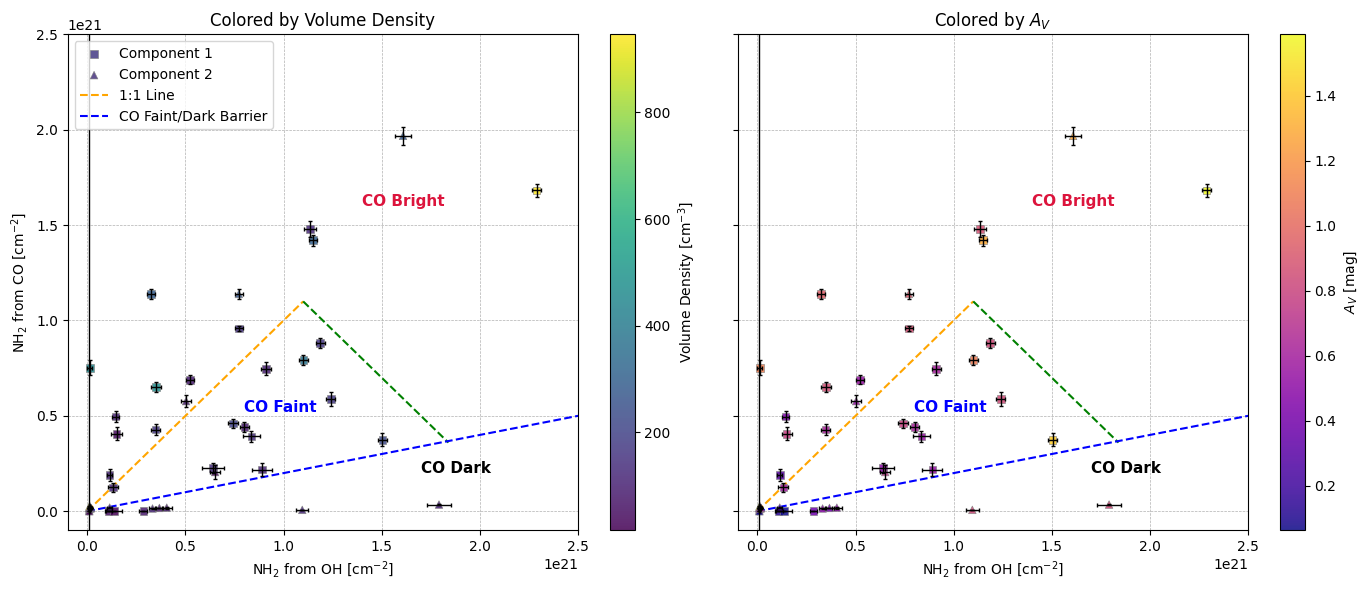

26
22


In [79]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6), sharex=True, sharey=True)

# ---------- PLOT 1: Volume Density ----------
comp1 = NH2_df[NH2_df['component'] == 'Component 1']
comp2 = NH2_df[NH2_df['component'] == 'Component 2']
ax = axes[0]
sc1 = ax.scatter(
    comp1['NH2_OH'], comp1['NH2_CO'],
    c=comp1['Volume Density [cm^-3]'], cmap='viridis',
    marker='s', s=30, edgecolors='gray', linewidths=0.5, alpha=0.85, zorder=3,
    label='Component 1'
)
ax.scatter(
    comp2['NH2_OH'], comp2['NH2_CO'],
    c=comp2['Volume Density [cm^-3]'], cmap='viridis',
    marker='^', s=30, edgecolors='gray', linewidths=0.5, alpha=0.85, zorder=3,
    label='Component 2'
)
ax.errorbar(comp1['NH2_OH'], comp1['NH2_CO'], xerr=comp1['NH2_OH_err'], yerr=comp1['NH2_CO_err'],
            fmt='none', ecolor='black', elinewidth=1, capsize=1.5, zorder=4)
ax.errorbar(comp2['NH2_OH'], comp2['NH2_CO'], xerr=comp2['NH2_OH_err'], yerr=comp2['NH2_CO_err'],
            fmt='none', ecolor='black', elinewidth=1, capsize=1.5, zorder=4)
ax.plot(np.linspace(0, 1.1e21), np.linspace(0, 1.1e21), ls='--', color='orange', label='1:1 Line', zorder=2)
# Add lines
x_vals = np.linspace(0, 3e21, 100)
x_valsinv = np.linspace(1.1e21, 1.84e21, 100)
ax.plot(x_valsinv, -1 * (x_valsinv-2.2e21), ls='--', color='green', zorder=2)
ax.plot(x_vals, 0.2 * x_vals, ls='--', color='blue', label = 'CO Faint/Dark Barrier', zorder=2)

ax.set_xlabel('NH$_2$ from OH [cm$^{-2}$]')
ax.set_ylabel('NH$_2$ from CO [cm$^{-2}$]')
ax.set_xlim([-0.1e21, 2.5e21])
ax.set_ylim([-0.1e21, 2.5e21])
ax.set_title('Colored by Volume Density')
ax.grid(True, linestyle='--', linewidth=0.5, zorder=0)
cbar1 = fig.colorbar(sc1, ax=ax)
cbar1.set_label('Volume Density [cm$^{-3}$]')
ax.legend()

# ---------- PLOT 2: Max Av ----------
ax = axes[1]
sc2 = ax.scatter(
    comp1['NH2_OH'], comp1['NH2_CO'],
    c=comp1['Total Av [mag]'], cmap='plasma',
    marker='s', s=30, edgecolors='gray', linewidths=0.5, alpha=0.85, zorder=3,
    label='Component 1'
)
ax.scatter(
    comp2['NH2_OH'], comp2['NH2_CO'],
    c=comp2['Total Av [mag]'], cmap='plasma',
    marker='^', s=30, edgecolors='gray', linewidths=0.5, alpha=0.85, zorder=3,
    label='Component 2'
)
ax.errorbar(comp1['NH2_OH'], comp1['NH2_CO'], xerr=comp1['NH2_OH_err'], yerr=comp1['NH2_CO_err'],
            fmt='none', ecolor='black', elinewidth=1, capsize=1.5, zorder=4)
ax.errorbar(comp2['NH2_OH'], comp2['NH2_CO'], xerr=comp2['NH2_OH_err'], yerr=comp2['NH2_CO_err'],
            fmt='none', ecolor='black', elinewidth=1, capsize=1.5, zorder=4)
ax.plot(np.linspace(0, 1.1e21), np.linspace(0, 1.1e21), ls='--', color='orange', label='1:1 Line', zorder=2)
# Add lines
x_vals = np.linspace(0, 3e21, 100)
x_valsinv = np.linspace(1.1e21, 1.84e21, 100)
ax.plot(x_valsinv, -1 * (x_valsinv-2.2e21), ls='--', color='green', zorder=2)
ax.plot(x_vals, 0.2 * x_vals, ls='--', color='blue', label = 'CO Faint/Dark Barrier', zorder=2)

ax.set_xlabel('NH$_2$ from OH [cm$^{-2}$]')
ax.set_title('Colored by $A_V$')
ax.grid(True, linestyle='--', linewidth=0.5, zorder=0)
cbar2 = fig.colorbar(sc2, ax=ax)
cbar2.set_label('$A_V$ [mag]')


for ax in axes:
    # CO Bright label (above 1:1 line)
    ax.text(1.4e21, 1.6e21, 'CO Bright', fontsize=11, color='crimson', weight='bold')

    # CO Faint label (wedge region)
    ax.text(0.8e21, 0.52e21, 'CO Faint', fontsize=11, color='blue', weight='bold')

    # CO Dark label (below blue line)
    ax.text(1.7e21, 0.2e21, 'CO Dark', fontsize=11, color='black', weight='bold')
plt.tight_layout()
plt.show()

print(len(comp1['NH2_OH']))
print(len(comp2['NH2_CO']))

In [64]:
def region_averages_by_cloud(df):
    """
    Computes and prints the mean values (with uncertainties) of NH2_OH, NH2_CO, 
    Volume Density, and A_V for three defined regions (A, B, C) within each unique 
    cloud in the input dataframe.
    """

    # Get the unique cloud names in the DataFrame
    clouds = df['Cloud'].unique()

    # Iterate over each cloud
    for cloud in clouds:
        # Subset the DataFrame to only include rows corresponding to the current cloud
        subdf = df[df['Cloud'] == cloud]

        # Define x and y for convenience (NH2_OH on x-axis, NH2_CO on y-axis)
        x = subdf['NH2_OH']
        y = subdf['NH2_CO']

        # ---------- REGION DEFINITIONS ----------
        # Region A: Above either the identity line (y = x) OR the orange line (y = -x + 2.2e21)
        # These are CO-bright sightlines
        regionA = (
            (y > x) | 
            (y > (-x + 2.2e21))
        )

        # Region B: Below both the identity and offset lines,
        # but still above the blue line (y = 0.2x); CO-faint region
        regionB = (
            (y <= x) & 
            (y <= (-x + 2.2e21)) & 
            (y >= 0.2 * x)
        )

        # Region C: Below the blue line (y = 0.2x); CO-dark region
        regionC = y < 0.2 * x

        # List of all region masks and their corresponding human-readable names
        regions = [regionA, regionB, regionC]
        region_names = [
            "Region A: Above green and orange lines - CO Bright",
            "Region B: Below green and orange, above blue - CO Faint",
            "Region C: Below blue line - CO Dark"
        ]

        # Print cloud name header
        print(f"\n--- Cloud: {cloud} ---")

        # Loop through each region and compute statistics
        for i, (mask, name) in enumerate(zip(regions, region_names), start=1):
            # Subset to points that fall in the current region
            region_subset = subdf[mask]
            print(f"\n{name}")

            if len(region_subset) > 0:
                n = len(region_subset)  # Number of points in the region

                # Compute means
                nh2_oh_mean = region_subset['NH2_OH'].mean()
                nh2_co_mean = region_subset['NH2_CO'].mean()
                vol_dens_mean = region_subset['Volume Density [cm^-3]'].mean()
                av_mean = region_subset['Total Av [mag]'].mean()

                # Compute uncertainties (standard error = std / sqrt(N))
                vol_dens_sem = region_subset['Volume Density [cm^-3]'].std(ddof=1) / np.sqrt(n)
                av_sem = region_subset['Total Av [mag]'].std(ddof=1) / np.sqrt(n)

                # Print statistics for the region
                print(f"  Number of points: {n}")
                print(f"  Mean NH2_OH: {nh2_oh_mean:.2e}")
                print(f"  Mean NH2_CO: {nh2_co_mean:.2e}")
                print(f"  Mean Volume Density: {vol_dens_mean:.2f} ± {vol_dens_sem:.2f}")
                print(f"  Mean A_V: {av_mean:.2f} ± {av_sem:.2f}")
            else:
                # If no data points fall in this region
                print("  No points in this region.")

#defining clouds
Polaris_df = NH2_df[NH2_df['Cloud'] == 'Polaris']
UrsaMaj_df = NH2_df[NH2_df['Cloud'] == 'Ursa Major']
Camelopardalis_df = NH2_df[NH2_df['Cloud'] == 'Camelopardalis']

#calling function
region_averages_by_cloud(Polaris_df)
region_averages_by_cloud(UrsaMaj_df)
region_averages_by_cloud(Camelopardalis_df)


--- Cloud: Polaris ---

Region A: Above green and orange lines - CO Bright
  Number of points: 9
  Mean NH2_OH: 5.52e+20
  Mean NH2_CO: 7.20e+20
  Mean Volume Density: 160.69 ± 29.24
  Mean A_V: 0.85 ± 0.10

Region B: Below green and orange, above blue - CO Faint
  Number of points: 8
  Mean NH2_OH: 8.90e+20
  Mean NH2_CO: 3.89e+20
  Mean Volume Density: 126.03 ± 21.14
  Mean A_V: 0.74 ± 0.11

Region C: Below blue line - CO Dark
  Number of points: 6
  Mean NH2_OH: 6.71e+20
  Mean NH2_CO: 1.58e+19
  Mean Volume Density: 120.32 ± 10.14
  Mean A_V: 0.58 ± 0.10

--- Cloud: Ursa Major ---

Region A: Above green and orange lines - CO Bright
  Number of points: 8
  Mean NH2_OH: 2.67e+20
  Mean NH2_CO: 5.99e+20
  Mean Volume Density: 321.31 ± 52.75
  Mean A_V: 0.85 ± 0.08

Region B: Below green and orange, above blue - CO Faint
  Number of points: 4
  Mean NH2_OH: 4.98e+20
  Mean NH2_CO: 3.48e+20
  Mean Volume Density: 221.90 ± 54.26
  Mean A_V: 0.81 ± 0.10

Region C: Below blue line - CO Da

In [65]:
def region_averages_custom(df, label):
    """
    Computes average NH2_OH, NH2_CO, Volume Density, and A_V for three user-defined regions.
    """
    x = df['NH2_OH']
    y = df['NH2_CO']

    # ---------- REGION DEFINITIONS ----------
    # Region A: Above green and orange lines, CO Bright
    regionA = (
        (x > 1.1e21) & (x < 1.84e21) &
        (y > x) &
        (y > -x + 2.2e21)
    )

    # Region B: Below green and orange lines, but above blue, CO Faint
    regionB = (
        (y <= x) &
        (y <= -x + 2.2e21) &
        (y >= 0.2 * x)
    )

    # Region C: Below the blue line, CO Dark
    regionC = y < 0.2 * x

    regions = [regionA, regionB, regionC]
    region_names = [
        "Region A: Above green and orange lines - CO Bright",
        "Region B: Below green and orange, above blue - CO Faint",
        "Region C: Below blue line"
    ]

    print(f"\n--- {label} ---")
    for i, (mask, name) in enumerate(zip(regions, region_names), start=1):
        subset = df[mask]
        print(f"\n{name}")
        if len(subset) > 0:
            print(f"  Number of points: {len(subset)}")
            print(f"  Mean NH2_OH: {subset['NH2_OH'].mean():.2e}")
            print(f"  Mean NH2_CO: {subset['NH2_CO'].mean():.2e}")
            print(f"  Mean Volume Density: {subset['Volume Density [cm^-3]'].mean():.2f}")
            print(f"  Mean A_V: {subset['Total Av [mag]'].mean():.2f}")
        else:
            print("  No points in this region.")

region_averages_custom(comp1, "Component 1")
region_averages_custom(comp2, "Component 2")


--- Component 1 ---

Region A: Above green and orange lines - CO Bright
  Number of points: 2
  Mean NH2_OH: 1.14e+21
  Mean NH2_CO: 1.45e+21
  Mean Volume Density: 211.40
  Mean A_V: 1.08

Region B: Below green and orange, above blue - CO Faint
  Number of points: 11
  Mean NH2_OH: 9.08e+20
  Mean NH2_CO: 4.77e+20
  Mean Volume Density: 164.76
  Mean A_V: 0.76

Region C: Below blue line
  Number of points: 3
  Mean NH2_OH: 1.77e+20
  Mean NH2_CO: 0.00e+00
  Mean Volume Density: 48.94
  Mean A_V: 0.19

--- Component 2 ---

Region A: Above green and orange lines - CO Bright
  Number of points: 1
  Mean NH2_OH: 1.61e+21
  Mean NH2_CO: 1.97e+21
  Mean Volume Density: 297.97
  Mean A_V: 1.29

Region B: Below green and orange, above blue - CO Faint
  Number of points: 3
  Mean NH2_OH: 2.26e+20
  Mean NH2_CO: 7.52e+19
  Mean Volume Density: 106.52
  Mean A_V: 0.65

Region C: Below blue line
  Number of points: 7
  Mean NH2_OH: 5.88e+20
  Mean NH2_CO: 1.60e+19
  Mean Volume Density: 114.56
 

In [66]:
def combined_region_averages(comp1, comp2):
    """
    Combines two DataFrames (comp1 and comp2) containing interstellar gas component data,
    then computes mean NH2_OH, NH2_CO, Volume Density, and A_V in three user-defined regions:
    - Region A: Above green and orange lines
    - Region B: Below green and orange lines, but above blue line
    - Region C: Below the blue line

    For Volume Density and A_V, also computes uncertainties using standard error of the mean.
    """

    # ---------- Combine Component DataFrames ----------
    # Merge comp1 and comp2 into a single DataFrame for unified region analysis
    df = pd.concat([comp1, comp2], ignore_index=True)

    # Extract axis variables
    x = df['NH2_OH']
    y = df['NH2_CO']

    # ---------- REGION DEFINITIONS ----------
    # Region A: Above either the identity line (y = x) OR the orange line (y = -x + 2.2e21)
    # These are CO-bright sightlines
    regionA = (
        (y > x) | 
        (y > (-x + 2.2e21))
    )

    # Region B: Below both the identity and offset lines,
    # but still above the blue line (y = 0.2x); CO-faint region
    regionB = (
        (y <= x) & 
        (y <= (-x + 2.2e21)) & 
        (y >= 0.2 * x)
    )

    # Region C: Below the blue line (y = 0.2x); CO-dark region
    regionC = y < 0.2 * x

    # List of all region masks and their corresponding human-readable names
    regions = [regionA, regionB, regionC]
    region_names = [
        "Region A: Above green and orange lines - CO Bright",
        "Region B: Below green and orange, above blue - CO Faint",
        "Region C: Below blue line - CO Dark"
    ]



    print(f"\n=== Combined Component Analysis ===")
    for i, (mask, name) in enumerate(zip(regions, region_names), start=1):
        subset = df[mask]
        print(f"\n{name}")
        if len(subset) > 0:
            n = len(subset)
            # Compute means
            mean_oh = subset['NH2_OH'].mean()
            mean_co = subset['NH2_CO'].mean()
            mean_density = subset['Volume Density [cm^-3]'].mean()
            mean_av = subset['Total Av [mag]'].mean()

            # Compute standard errors
            density_err = np.std(subset['Volume Density [cm^-3]'], ddof=1) / np.sqrt(n)
            av_err = np.std(subset['Total Av [mag]'], ddof=1) / np.sqrt(n)

            # Print results
            print(f"  Number of points: {n}")
            print(f"  Mean NH2_OH: {mean_oh:.2e}")
            print(f"  Mean NH2_CO: {mean_co:.2e}")
            print(f"  Mean Volume Density: {mean_density:.2f} ± {density_err:.2f}")
            print(f"  Mean A_V: {mean_av:.2f} ± {av_err:.2f}")
        else:
            print("  No points in this region.")

combined_region_averages(comp1, comp2)


=== Combined Component Analysis ===

Region A: Above green and orange lines - CO Bright
  Number of points: 24
  Mean NH2_OH: 4.30e+20
  Mean NH2_CO: 5.90e+20
  Mean Volume Density: 271.25 ± 50.00
  Mean A_V: 0.86 ± 0.07

Region B: Below green and orange, above blue - CO Faint
  Number of points: 14
  Mean NH2_OH: 7.62e+20
  Mean NH2_CO: 3.91e+20
  Mean Volume Density: 152.28 ± 22.04
  Mean A_V: 0.73 ± 0.07

Region C: Below blue line - CO Dark
  Number of points: 10
  Mean NH2_OH: 4.65e+20
  Mean NH2_CO: 1.12e+19
  Mean Volume Density: 94.87 ± 13.67
  Mean A_V: 0.42 ± 0.09


In [67]:
def region_averages_by_cloud(df):
    """
    Computes average NH2_OH, NH2_CO, Volume Density, and A_V for regions A, B, and C
    within each unique cloud in the dataframe.
    """
    clouds = df['Cloud'].unique()

    for cloud in clouds:
        subdf = df[df['Cloud'] == cloud]
        x = subdf['NH2_OH']
        y = subdf['NH2_CO']

        # ---------- REGION DEFINITIONS ----------
        # Region A: Above both the identity line (y = x) and diagonal offset (y = -x + 2.2e21)
        regionA = (
            (y > x) &
            (y > -x + 2.2e21)
        )
    
        # Region B: Below both identity and offset lines, but still above the line y = 0.2x
        regionB = (
            (y <= x) &
            (y <= -x + 2.2e21) &
            (y >= 0.2 * x)
        )
    
        # Region C: Below the blue line y = 0.2x
        regionC = y < 0.2 * x


        regions = [regionA, regionB, regionC]
        region_names = [
            "Region A: Above green and orange lines - CO Bright",
            "Region B: Below green and orange, above blue - CO Faint",
            "Region C: Below blue line - CO Dark"
        ]

        print(f"\n--- Cloud: {cloud} ---")
        for i, (mask, name) in enumerate(zip(regions, region_names), start=1):
            region_subset = subdf[mask]
            print(f"\n{name}")
            if len(region_subset) > 0:
                print(f"  Number of points: {len(region_subset)}")
                print(f"  Mean NH2_OH: {region_subset['NH2_OH'].mean():.2e}")
                print(f"  Mean NH2_CO: {region_subset['NH2_CO'].mean():.2e}")
                print(f"  Mean Volume Density: {region_subset['Volume Density [cm^-3]'].mean():.2f}")
                print(f"  Mean A_V: {region_subset['Total Av [mag]'].mean():.2f}")
            else:
                print("  No points in this region.")

Polaris_df = NH2_df[NH2_df['Cloud'] == 'Polaris']
UrsaMaj_df = NH2_df[NH2_df['Cloud'] == 'Ursa Major']
Camelopardalis_df = NH2_df[NH2_df['Cloud'] == 'Camelopardalis']

region_averages_by_cloud(Polaris_df)
region_averages_by_cloud(UrsaMaj_df)
region_averages_by_cloud(Camelopardalis_df)


--- Cloud: Polaris ---

Region A: Above green and orange lines - CO Bright
  Number of points: 3
  Mean NH2_OH: 1.30e+21
  Mean NH2_CO: 1.62e+21
  Mean Volume Density: 240.26
  Mean A_V: 1.15

Region B: Below green and orange, above blue - CO Faint
  Number of points: 8
  Mean NH2_OH: 8.90e+20
  Mean NH2_CO: 3.89e+20
  Mean Volume Density: 126.03
  Mean A_V: 0.74

Region C: Below blue line - CO Dark
  Number of points: 6
  Mean NH2_OH: 6.71e+20
  Mean NH2_CO: 1.58e+19
  Mean Volume Density: 120.32
  Mean A_V: 0.58

--- Cloud: Ursa Major ---

Region A: Above green and orange lines - CO Bright
  No points in this region.

Region B: Below green and orange, above blue - CO Faint
  Number of points: 4
  Mean NH2_OH: 4.98e+20
  Mean NH2_CO: 3.48e+20
  Mean Volume Density: 221.90
  Mean A_V: 0.81

Region C: Below blue line - CO Dark
  Number of points: 4
  Mean NH2_OH: 1.55e+20
  Mean NH2_CO: 4.34e+18
  Mean Volume Density: 56.71
  Mean A_V: 0.19

--- Cloud: Camelopardalis ---

Region A: Abo

In [68]:
merged_CO_bright = merged_df_b19[merged_df_b19['Upper Limit'] == 'F']
merged_CO_bright = merged_CO_bright[merged_CO_bright['line'] == 'CO']
merged_CO_dark = merged_df_b19[merged_df_b19['Upper Limit'] == 'T']
merged_CO_dark = merged_CO_dark[merged_CO_dark['line'] == 'CO']

CO_dark_voldens = merged_CO_dark['Volume Density [cm^-3]'].to_numpy()
CO_dark_coldens = merged_CO_dark['Column Density [cm^-2]'].to_numpy()
CO_bright_voldens = merged_CO_bright['Volume Density [cm^-3]'].to_numpy()
CO_bright_coldens = merged_CO_bright['Column Density [cm^-2]'].to_numpy()

print('Average CO Dark Column Density:', np.mean(CO_dark_coldens), 'cm^-2')
print('Average CO Dark Volume Density:', np.mean(CO_dark_voldens), 'cm^-3')
print('Average CO Bright Column Density:', np.mean(CO_bright_coldens), 'cm^-2')
print('Average CO Bright Volume Density:', np.mean(CO_bright_voldens), 'cm^-3')

#separate CO dark, CO faint, and CO bright

Average CO Dark Column Density: 5.619958651130431e+21 cm^-2
Average CO Dark Volume Density: 175.56404092763643 cm^-3
Average CO Bright Column Density: 6.274086948968657e+21 cm^-2
Average CO Bright Volume Density: 198.5591491120526 cm^-3


In [69]:
sigWOH67_2nd

array([8.05871531e-05, 4.22510354e-03, 7.55481066e-05, 3.36057348e-03,
       6.83149725e-03, 2.42455317e-03, 2.17741710e-04, 4.49803335e-03,
       5.69780158e-05, 5.46531141e-03, 1.07394687e-02, 5.90418452e-04,
       8.21585369e-05, 7.29273490e-05, 2.58564694e-05, 3.56674121e-04,
       4.50535028e-03, 3.73162078e-03, 1.75624450e-04, 9.02102161e-05,
       3.59987097e-04, 3.63750857e-03])

In every case where we have CO upper limits but no OH upper limits, calculate N(H2) avg

Defining:
CO-Dark = Upper limits in CO, no upper limits in OH
CO-Bright = There is CO (assuming OH is everywhere)

I need to 
- avg CO Dark gas NH2 value - done
- CO Dark NH2 vs NHI - done
- Avg volume density of CO Dark components and CO bright components (upper lim T, upper lim F) and col dens. Question: Is this referring to the bayestar mapping?

In [70]:
#upper limits only for CO
fitcoord_df_uplim = fitcoord_df[fitcoord_df['Upper Limit'] == 'T']

CO_UpLim_df = fitcoord_df_uplim[fitcoord_df_uplim['line'] == 'CO']

WCO_Dark = CO_UpLim_df['integral'].to_numpy()
sigWCO_Dark = CO_UpLim_df['integral error'].to_numpy()

#NHI for all CO Dark Components
#Define function via Chengular et. al. 2018 (optically thin HI) https://arxiv.org/pdf/1305.0951
def NHIcalc(WHI):
    NHI = 1.823e18 * WHI
    return NHI

#define NHI 

#NHI CO Dark:
HI_df = fitcoord_df[fitcoord_df['line'] == 'HI']
CO_positions = CO_UpLim_df[['l (deg)', 'b (deg)', 'comp']]

# Merge to align HI with CO upper limit positions
merged_df = pd.merge(
    CO_positions,
    HI_df[['l (deg)', 'b (deg)', 'comp', 'integral', 'integral error']],
    on=['l (deg)', 'b (deg)', 'comp'],
    how='inner'
)

# Compute NHI and its uncertainty
NHI_CO_Dark = NHIcalc(merged_df['integral'].to_numpy())
sigNHI_CO_Dark = NHIcalc(merged_df['integral error'].to_numpy())


In [71]:
#CO Dark NH2:
Dark_NH2 = NH2viaCO(WCO_Dark)
Dark_NH2_avg = np.mean(Dark_NH2)
print('Average N(H2) Value of CO-Dark Gas:', Dark_NH2_avg, 'cm^-2')
print('Average N(HI) Value of CO-Dark Gas:', np.mean(NHI_CO_Dark), 'cm^-2')
#do the same for CO Bright points

Average N(H2) Value of CO-Dark Gas: 1.7935565516433727e+19 cm^-2
Average N(HI) Value of CO-Dark Gas: 4.4125061053440046e+20 cm^-2


Text(0, 0.5, 'N(HI) [cm^-2]')

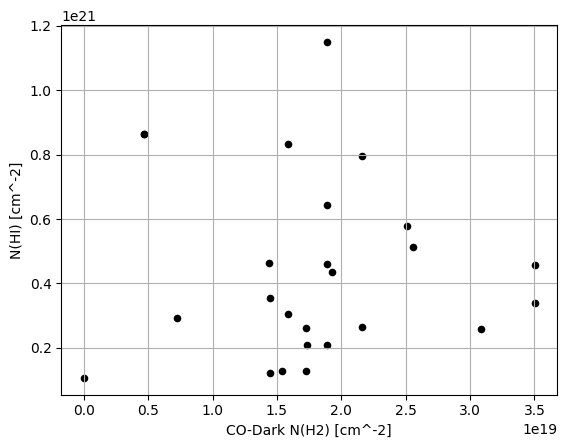

In [72]:
plt.scatter(Dark_NH2, NHI_CO_Dark, s = 20, color = 'black')

plt.grid(True)
plt.xlabel('CO-Dark N(H2) [cm^-2]')
plt.ylabel('N(HI) [cm^-2]')

(-0.02, 0.45)

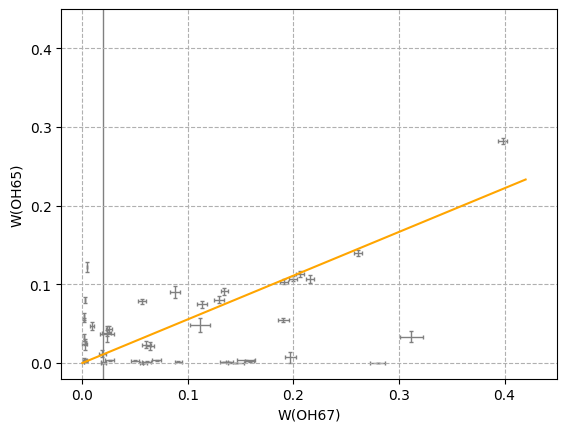

In [73]:
WOH67 = OH67comp1and2df['integral'].to_numpy()
WOH65 = OH65comp1and2df['integral'].to_numpy()
sigWOH67 = OH67comp1and2df['integral error'].to_numpy()
sigWOH65 = OH65comp1and2df['integral error'].to_numpy()

fiveninths_x = np.linspace(0, 0.42, 100)
def fiveninths(x):
    y = (5/9)*x
    return y

#plt.scatter(WOH67, WOH65, s = 20, color = 'black')
plt.errorbar(WOH67, WOH65, xerr = sigWOH67, yerr = sigWOH65, fmt='none', ecolor='gray', elinewidth=1, capsize=1.5, zorder=1)
plt.plot(fiveninths_x, fiveninths(fiveninths_x), color = 'orange')
plt.grid(True, ls = '--')
plt.xlabel('W(OH67)')
plt.ylabel('W(OH65)')
plt.xlim(-0.02, 0.45)
plt.ylim(-0.02, 0.45)
#plt.errorbar(WOH67, WOH65, xerr = sigWOH67, yerr = sigWOH65, marker = 'o')

(-0.02, 0.45)

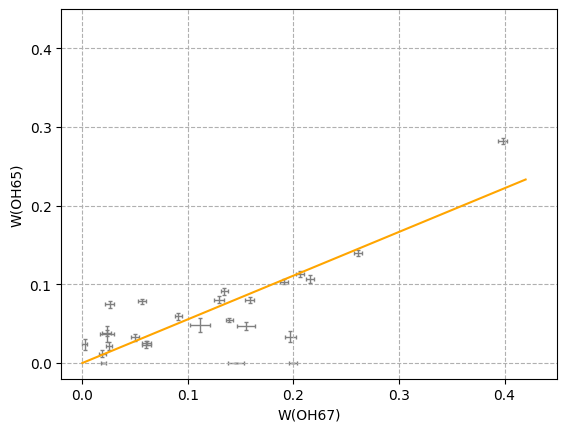

In [74]:
OH65_NoUpLim_df = fitcoord_df_filtered[fitcoord_df_filtered['line'] == '65']
OH65_NoUpLim_df = OH65_NoUpLim_df[OH65_NoUpLim_df['comp'] == 1]
WOH65a = OH65_NoUpLim_df['integral'].to_numpy()
sigWOH65a = OH65_NoUpLim_df['integral error'].to_numpy()
plt.errorbar(WOH67a, WOH65a, xerr = sigWOH67a, yerr = sigWOH65a, fmt='none', ecolor='gray', elinewidth=1, capsize=1.5, zorder=1)
plt.plot(fiveninths_x, fiveninths(fiveninths_x), color = 'orange')
plt.grid(True, ls = '--')
plt.xlabel('W(OH67)')
plt.ylabel('W(OH65)')
plt.xlim(-0.02, 0.45)
plt.ylim(-0.02, 0.45)


In [75]:
print(sigWOH65)

[4.92781678e-03 1.94927917e-04 6.21691593e-04 5.49486622e-03
 6.21691593e-04 1.24189602e-04 1.24189602e-04 3.92545625e-03
 5.46481240e-05 0.00000000e+00 5.46481240e-05 0.00000000e+00
 3.12292394e-03 0.00000000e+00 2.54573333e+00 5.90256029e-04
 5.90256029e-04 4.50788082e-03 3.73133723e-04 4.21640888e-03
 3.73133723e-04 6.92784418e-05 2.00667073e-03 3.61171948e-03
 2.59917604e-03 4.86261312e-03 5.98996358e-03 6.79198029e-03
 7.08228905e-03 2.91286620e-03 4.78049767e-03 1.51179211e-04
 4.10482219e-03 1.51179211e-04 1.24638957e-04 3.63442910e-03
 2.92671645e-05 3.59901319e-03 2.95128766e-03 3.99312183e-04
 8.73290328e-03 7.49737829e-03 3.19689284e-03 2.73251834e-03
 9.55626551e-05 4.02363730e-03 1.70049158e-04 3.99405618e-03
 1.67219517e-04 9.87218078e-03 4.65389764e-03 6.53107506e-04
 3.94230662e-03 5.08949596e-03 6.86726811e-03]


In [76]:
print(len(WCO))
comp2 = NH2_df[NH2_df['component'] == 'Component 2'].copy()
comp2 = comp2[comp2['Total Av [mag]'] > 0]
comp1 = NH2_df[NH2_df['component'] == 'Component 1'].copy()
comp1 = comp1[comp1['Total Av [mag]'] > 0]
print(comp2['Total Av [mag]'])
print(len(comp2['Total Av [mag]']))
print(len(comp1['Total Av [mag]']))

26
26    0.839006
27    0.531475
28    0.831956
29    0.528482
30    1.286214
31    0.291662
32    0.377041
33    0.776805
34    0.623008
35    0.867756
36    0.868955
37    0.127827
38    0.608938
39    1.082287
40    1.588171
41    0.860742
42    0.577757
43    0.948918
44    0.784317
45    0.543488
46    0.621320
47    0.427502
Name: Total Av [mag], dtype: float64
22
26


ValueError: operands could not be broadcast together with shapes (26,) (22,) 

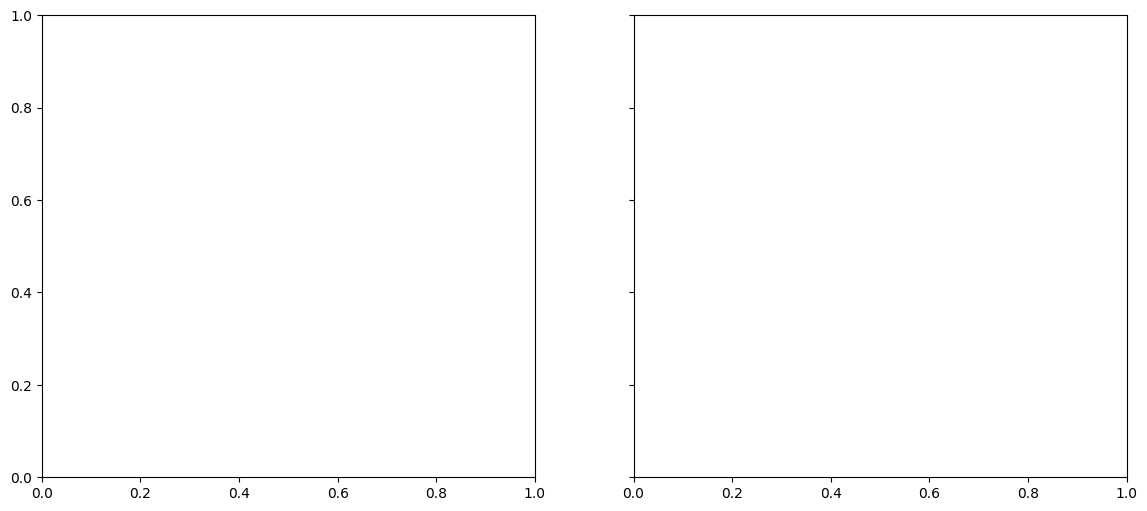

In [77]:
#plotting R vs. distance (R = WCO/Av)

fig, axes = plt.subplots(ncols=2, figsize=(14, 6), sharex=True, sharey=True)

# Compute R
comp1 = NH2_df[NH2_df['component'] == 'Component 1'].copy()
comp2 = NH2_df[NH2_df['component'] == 'Component 2'].copy()

# Avoid division by zero
comp1 = comp1[comp1['Total Av [mag]'] > 0]
comp2 = comp2[comp2['Total Av [mag]'] > 0]
comp1['R'] = WCO/ comp1['Total Av [mag]']
comp2['R'] = WCO / comp2['Total Av [mag]']

# ---------- PLOT 1: R vs Distance ----------
ax = axes[0]
ax.scatter(
    comp1['Distance [pc]'], comp1['R'],
    color='tab:blue', marker='s', s=30, edgecolors='gray',
    linewidths=0.5, alpha=0.85, label='Component 1'
)
ax.scatter(
    comp2['Distance [pc]'], comp2['R'],
    color='tab:green', marker='^', s=30, edgecolors='gray',
    linewidths=0.5, alpha=0.85, label='Component 2'
)
ax.set_xlabel('Distance to Cloud [pc]')
ax.set_ylabel(r'$R = W(\mathrm{CO}) / A_V$ [K km s$^{-1}$ mag$^{-1}$]')
ax.set_title('CO Brightness per Extinction vs. Distance')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()

# ---------- PLOT 2: NH2 from OH vs CO ----------
ax = axes[1]
ax.scatter(
    comp1['NH2_OH'], comp1['NH2_CO'],
    color='tab:blue', marker='s', s=30, edgecolors='gray',
    linewidths=0.5, alpha=0.85, label='Component 1'
)
ax.scatter(
    comp2['NH2_OH'], comp2['NH2_CO'],
    color='tab:green', marker='^', s=30, edgecolors='gray',
    linewidths=0.5, alpha=0.85, label='Component 2'
)
ax.errorbar(comp1['NH2_OH'], comp1['NH2_CO'], xerr=comp1['NH2_OH_err'], yerr=comp1['NH2_CO_err'],
            fmt='none', ecolor='gray', elinewidth=1, capsize=1.5)
ax.errorbar(comp2['NH2_OH'], comp2['NH2_CO'], xerr=comp2['NH2_OH_err'], yerr=comp2['NH2_CO_err'],
            fmt='none', ecolor='gray', elinewidth=1, capsize=1.5)
ax.plot(np.linspace(0, 3e21), np.linspace(0, 3e21), ls='--', color='orange', label='1:1 Line')
ax.set_xlabel('NH$_2$ from OH [cm$^{-2}$]')
ax.set_ylabel('NH$_2$ from CO [cm$^{-2}$]')
ax.set_xlim([-0.1e21, 2.5e21])
ax.set_ylim([-0.1e21, 2.5e21])
ax.set_title('OH vs CO')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()

plt.tight_layout()
plt.show()